## 2.8 Итоговое задаение

### Вас пригласили поучаствовать в одном из проектов UNICEF — 
### международного подразделения ООН, чья миссия состоит в
### повышении уровня благополучия детей по всему миру. 

### Суть проекта — отследить влияние условий жизни учащихся в
### возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на
### ранней стадии выявлять студентов, находящихся в группе риска.

### И сделать это можно с помощью модели, которая предсказывала бы
### результаты госэкзамена по математике для каждого ученика школы
### (вот она, сила ML!). Чтобы определиться с параметрами будущей
### модели, проведите разведывательный анализ данных и составьте
### отчёт по его результатам. 

Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

Рекомендации по выполнению проекта
Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
Посмотрите на распределение признака для числовых переменных, устраните выбросы.
Оцените количество уникальных значений для номинативных переменных.
По необходимости преобразуйте данные
Проведите корреляционный анализ количественных переменных
Отберите не коррелирующие переменные.
Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

## 1.1 Загружаем используемые библиотеки

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

## 1.2 Загружаем датасет

In [2]:
math = pd.read_csv('stud_math.csv')
display(math)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


## 1.3 Проверяем количество числовых и нечисловых столбцов, их наименование и описание числовых столбцов

In [4]:
display(math.info())
display(math.columns)
display(math.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


## 3.1 Выводы:

В датасете присутствует 13 числовых столбцов и 17 строковых
Видно выпадающее значение в столбце Fedu  со значением 40. Из описания знаем, что максимальное значение равно 4. Видимо ошибка является опечаткой и значение равно 4. 
Далее видим столбец, который не попал в описание: 'studytime, granular'. Из названия не понятно значение данного столбца. Разве только количество месяцев подготовки к экзамену. Предположение проверим позже. 
3 из 30 столбцов заполнены полностью: название школы, полы, возраст
Субъективно наиболее важныt данные находятся в столбце score имеет 389 из 395 заполненных строк
Пропущенных значений не много поэтому их можно рассмотреть

## 1.4 Находим значения, для строк без оценки, для удобства отображения вводим заведомо выпадающую оценку

In [5]:
math.score = math.score.apply(lambda x: 1000 if pd.isnull(x) else x) 

## 1.5  Создаем датасет для анализа списка учеников без оценки

In [6]:
math_1000 = math[math.score == 1000]
display(math_1000)
# Задаем требование визуализации 50 колонок и 50 строк 
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,...,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,1000.0
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,...,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,1000.0
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,...,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,1000.0
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,...,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,1000.0
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,...,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,1000.0
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,...,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,1000.0


## 3.2. Ученики без оценки
В списке студентов без оценки вообще все из большой семьи (GT3), все до 20 лет, все хотят получить высшее образование. У каждого благополучные отношения внутри семьи. Все живут в полноценной семье (т.е. родители живут вместе). Вывод об отсутствии оценки сделать сложно. Предположить можно лишь то, что данные ученики должны были бы получить оценку выше среднего.
Пародоксальная ситуация для данного датасета math 1000. Все родители проживают вместе, но у двух учеников опекун - мама. Как такое возможно? Либо ошибка в значениях, либо вторая семья после развода. 

## 1.6 Создаем датасет для списка учеников без оценки

In [7]:
math_1  = math[math.score<200]
display(math_1.score.value_counts()) # Смотрим распределение полученных студентами оценок

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

У 37 учеников в распределении стоит оценка 0 по 100 бальной шкале. Данная оценка подозрительна. Посмотрим распределение на гистограмме

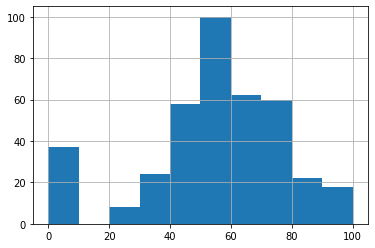

In [8]:
display(math_1.score.hist()) # Смотрим гистограмму успеваемости учеников

 Анализ датасета с выпадающей оценкой 0 может дать преломленное понимание трендов. Создадим датасет данных учеников оценка которых попадает в нормальное распределение и больше 1. А также создадим датасет учеников, которые имеют оценку 0

In [55]:
math_3 = math_1[math_1.score == 0] # Датасет для анализа учеников с нулевой оценкой
math_2 = math_1[math_1.score>0] # Датасет для анализа учеников с оценкой выше 0 (получивших оценку)
display(math_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               352 non-null    object 
 1   sex                  352 non-null    object 
 2   age                  352 non-null    int64  
 3   address              338 non-null    object 
 4   famsize              328 non-null    object 
 5   Pstatus              311 non-null    object 
 6   Medu                 350 non-null    float64
 7   Fedu                 331 non-null    float64
 8   Mjob                 335 non-null    object 
 9   Fjob                 320 non-null    object 
 10  reason               337 non-null    object 
 11  guardian             323 non-null    object 
 12  traveltime           329 non-null    float64
 13  studytime            345 non-null    float64
 14  failures             332 non-null    float64
 15  schoolsup            343 non-null    obj

None

In [10]:
display(math_3.head(5))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0


Количество строк данных при фильтрации по оценке сократилось с 395 до 352. (Создание датасета math_2)
 Рассмотрим все столбцы датасета

## ---school---

In [11]:
# ---school---
display(math_2.loc[:,['school']].info())
display(math_2.school.value_counts())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  352 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


None

GP    311
MS     41
Name: school, dtype: int64

Значения графы school запонены полностью. Нет пропущенных значений
В датасете представлены ученики только двух школ: 311 учеников школы 'GP' и 41 ученик школы'MS'. Сравним средние оценки учеников этих школ.

In [12]:
display(math_2.score.mean())
display(math_2.score[math_2.school == 'GP'].mean())
display(math_2.score[math_2.school == 'MS'].mean())

57.75568181818182

58.21543408360129

54.26829268292683

 Средняя оценка всех учеников составляет 57.76, оценка учеников школы 'GP' 58.22, оценка учеников школы MS = 54.27.
 Проверить правильность вывода о том среди получивших оценку учеников, ученики школы 'GP' сдали экзамен лучше чем ученики школы 'MS'

## ---sex---

In [13]:
display(math_2.loc[:,['sex']].info())
display(math_2.sex.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     352 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


None

F    182
M    170
Name: sex, dtype: int64

Значения графы sex запонены полностью. Нет пропущенных значений
Среди сдавших экзамен и получивших оценку учеников 182 девушки и 170 юношей
Сравним среднюю mоценку девушек и юношей

In [16]:
display(math_2.score.mean())
display(math_2.score[math_2.sex == 'F'].mean())
display(math_2.score[math_2.sex == 'M'].mean())


57.75568181818182

56.15384615384615

59.470588235294116

 Полученные данные говорят о том, что девушки имеют среднюю оценку 56.15 а юноши - 59.47
 Проверить правильность вывода о том, что юноши знают математику лучше чем девушки !!!!

## ---age---


In [14]:
display(math_2.loc[:,['age']].info())
display(math_2.age.value_counts())
# Значения графы age запонены полностью. Нет пропущенных значений
# Среди сдавших экзамен и получивших оценку учеников: 
#76 15летних
#96 16летних
#90 17летних
#69 18летних
#19 16летних
#3  20летних
#1  21летний
#1  22летний

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     352 non-null    int64
dtypes: int64(1)
memory usage: 5.5 KB


None

16    96
17    90
15    76
18    69
19    16
20     3
22     1
21     1
Name: age, dtype: int64

 Значения графы age запонены полностью. Нет пропущенных значений
 Среди сдавших экзамен и получивших оценку учеников: 
####96 16летних
####90 17летних
####69 18летних
####19 19летних
####3  20летних
####1  21летний
####1  22летний

### Анализ значений "пол", "возраст", "школа"  и влияние на оценку показывает отсутствие достоверных выводов. Поэтому, рассмотрим их вместе. 

In [18]:
math_4 = math_2.groupby(['age', 'school', 'sex']).mean()

In [19]:
math_4

Medu      Fedu  traveltime  studytime  failures  \
age school sex                                                        
15  GP     F    2.794118  3.696970    1.266667   2.303030  0.354839   
           M    3.238095  2.837838    1.333333   2.023810  0.162162   
16  GP     F    2.816327  2.562500    1.354167   2.104167  0.183673   
           M    2.888889  2.522727    1.418605   1.733333  0.166667   
17  GP     F    2.739130  2.558140    1.357143   2.369565  0.090909   
           M    2.545455  2.517241    1.531250   1.548387  0.387097   
    MS     F    2.571429  2.428571    1.500000   2.000000  0.000000   
           M    3.000000  2.500000    2.000000   1.750000  0.000000   
18  GP     F    2.904762  2.700000    1.300000   2.523810  0.350000   
           M    3.125000  2.608696    1.409091   2.125000  0.217391   
    MS     F    2.692308  2.750000    2.083333   2.153846  0.000000   
           M    2.272727  2.300000    2.000000   1.454545  0.363636   
19  GP     F    1.888889  1.555556    1.333333   2.625000  1.125000   
           M    3.500000  3.250000    1.250000   1.750000  0.750000   
    MS     F    3.000000  2.000000    2.000000   2.000000  2.000000   
           M    1.000000  1.000000    2.000000   1.000000  0.500000   
20  GP     M    3.000000  2.000000    1.000000   1.000000  0.000000   
    MS     F    4.000000  2.000000    2.000000   3.000000  2.000000   
           M    2.000000  2.000000    1.000000   2.000000  2.000000   
21  MS     M    1.000000  1.000000    1.000000   1.000000  3.000000   
22  GP     M    3.000000  1.000000    1.000000   1.000000  3.000000   

                studytime, granular    famrel  freetime     goout    health  \
age school sex                                                                
15  GP     F              -6.909091  4.000000  2.941176  2.676471  3.363636   
           M              -6.071429  4.028571  3.609756  2.833333  3.609756   
16  GP     F              -6.312500  3.640000  3.122449  3.145833  3.416667   
           M              -5.200000  3.955556  3.347826  3.044444  4.000000   
17  GP     F              -7.108696  4.000000  2.933333  3.022727  3.363636   
           M              -4.645161  4.062500  3.406250  3.437500  3.827586   
    MS     F              -6.000000  2.833333  3.428571  3.428571  2.714286   
           M              -5.250000  3.500000  4.500000  4.250000  2.500000   
18  GP     F              -7.571429  4.157895  3.100000  3.380952  3.238095   
           M              -6.375000  4.000000  3.086957  3.416667  3.500000   
    MS     F              -6.461538  4.363636  2.923077  3.000000  3.384615   
           M              -4.363636  3.800000  3.363636  3.000000  3.818182   
19  GP     F              -7.875000  3.875000  3.000000  2.444444  3.111111   
           M              -5.250000  4.000000  3.750000  3.000000  3.250000   
    MS     F              -6.000000  3.000000  2.000000  2.000000  3.000000   
           M              -3.000000  3.500000  3.000000  3.500000  5.000000   
20  GP     M              -3.000000  5.000000  5.000000  3.000000  5.000000   
    MS     F              -9.000000  5.000000  4.000000  3.000000  3.000000   
           M              -6.000000  5.000000  5.000000  4.000000  4.000000   
21  MS     M              -3.000000  5.000000  5.000000  3.000000  3.000000   
22  GP     M              -3.000000  5.000000  4.000000  5.000000  1.000000   

                  absences      score  
age school sex                         
15  GP     F      4.500000  53.382353  
           M      3.000000  66.666667  
16  GP     F     13.900000  55.900000  
           M      5.477273  62.826087  
17  GP     F      7.866667  57.717391  
           M      7.300000  52.878788  
    MS     F      6.428571  55.000000  
           M      2.750000  62.500000  
18  GP     F     11.047619  58.095238  
           M      7.347826  55.833333  
    MS     F      1.923077  56.538462  
           M      4.600000  51.818182  
19  GP  

Получили значение средних результатов студентов для каждого возраста в зависимости от пола и выбранной школы

Приведем значения в читаемый вид

In [20]:
math_5 = math_4.unstack(1)

In [21]:
math_5

Medu                Fedu           traveltime            \
school         GP        MS        GP        MS         GP        MS   
age sex                                                                
15  F    2.794118       NaN  3.696970       NaN   1.266667       NaN   
    M    3.238095       NaN  2.837838       NaN   1.333333       NaN   
16  F    2.816327       NaN  2.562500       NaN   1.354167       NaN   
    M    2.888889       NaN  2.522727       NaN   1.418605       NaN   
17  F    2.739130  2.571429  2.558140  2.428571   1.357143  1.500000   
    M    2.545455  3.000000  2.517241  2.500000   1.531250  2.000000   
18  F    2.904762  2.692308  2.700000  2.750000   1.300000  2.083333   
    M    3.125000  2.272727  2.608696  2.300000   1.409091  2.000000   
19  F    1.888889  3.000000  1.555556  2.000000   1.333333  2.000000   
    M    3.500000  1.000000  3.250000  1.000000   1.250000  2.000000   
20  F         NaN  4.000000       NaN  2.000000        NaN  2.000000   
    M    3.000000  2.000000  2.000000  2.000000   1.000000  1.000000   
21  M         NaN  1.000000       NaN  1.000000        NaN  1.000000   
22  M    3.000000       NaN  1.000000       NaN   1.000000       NaN   

        studytime            failures           studytime, granular            \
school         GP        MS        GP        MS                  GP        MS   
age sex                                                                         
15  F    2.303030       NaN  0.354839       NaN           -6.909091       NaN   
    M    2.023810       NaN  0.162162       NaN           -6.071429       NaN   
16  F    2.104167       NaN  0.183673       NaN           -6.312500       NaN   
    M    1.733333       NaN  0.166667       NaN           -5.200000       NaN   
17  F    2.369565  2.000000  0.090909  0.000000           -7.108696 -6.000000   
    M    1.548387  1.750000  0.387097  0.000000           -4.645161 -5.250000   
18  F    2.523810  2.153846  0.350000  0.000000           -7.571429 -6.461538   
    M    2.125000  1.454545  0.217391  0.363636           -6.375000 -4.363636   
19  F    2.625000  2.000000  1.125000  2.000000           -7.875000 -6.000000   
    M    1.750000  1.000000  0.750000  0.500000           -5.250000 -3.000000   
20  F         NaN  3.000000       NaN  2.000000                 NaN -9.000000   
    M    1.000000  2.000000  0.000000  2.000000           -3.000000 -6.000000   
21  M         NaN  1.000000       NaN  3.000000                 NaN -3.000000   
22  M    1.000000       NaN  3.000000       NaN           -3.000000       NaN   

           famrel            freetime               goout              health  \
school         GP        MS        GP        MS        GP        MS        GP   
age sex                                                                         
15  F    4.000000       NaN  2.941176       NaN  2.676471       NaN  3.363636   
    M    4.028571       NaN  3.609756       NaN  2.833333       NaN  3.609756   
16  F    3.640000       NaN  3.122449       NaN  3.145833       NaN  3.416667   
    M    3.955556       NaN  3.347826       NaN  3.044444       NaN  4.000000   
17  F    4.000000  2.833333  2.933333  3.428571  3.022727  3.428571  3.363636   
    M    4.062500  3.500000  3.406250  4.500000  3.437500  4.250000  3.827586   
18  F    4.157895  4.363636  3.100000  2.923077  3.380952  3.000000  3.238095   
    M    4.000000  3.800000  3.086957  3.363636  3.416667  3.000000  3.500000   
19  F    3.875000  3.000000  3.000000  2.000000  2.444444  2.000000  3.111111   
    M    4.000000  3.500000  3.750000  3.000000  3.000000  3.500000  3.250000   
20  F         NaN  5.000000       NaN  4.000000       NaN  3.000000       NaN   
    M    5.000000  5.000000  5.000000  5.000000  3.000000  4.000000  5.000000   
21  M         NaN  5.000000       NaN  5.000000       NaN  3.000000       NaN   
22  M    5.000000       NaN  4.000000       NaN  5.000000       NaN  1.000000   

                    absences    

In [22]:
math_6 = math_5.unstack(1)

In [23]:
math_6

Medu                                    Fedu                      \
school        GP                  MS                  GP                  MS   
sex            F         M         F         M         F         M         F   
age                                                                            
15      2.794118  3.238095       NaN       NaN  3.696970  2.837838       NaN   
16      2.816327  2.888889       NaN       NaN  2.562500  2.522727       NaN   
17      2.739130  2.545455  2.571429  3.000000  2.558140  2.517241  2.428571   
18      2.904762  3.125000  2.692308  2.272727  2.700000  2.608696  2.750000   
19      1.888889  3.500000  3.000000  1.000000  1.555556  3.250000  2.000000   
20           NaN  3.000000  4.000000  2.000000       NaN  2.000000  2.000000   
21           NaN       NaN       NaN  1.000000       NaN       NaN       NaN   
22           NaN  3.000000       NaN       NaN       NaN  1.000000       NaN   

            traveltime                          studytime                      \
school              GP                  MS             GP                  MS   
sex       M          F         M         F    M         F         M         F   
age                                                                             
15      NaN   1.266667  1.333333       NaN  NaN  2.303030  2.023810       NaN   
16      NaN   1.354167  1.418605       NaN  NaN  2.104167  1.733333       NaN   
17      2.5   1.357143  1.531250  1.500000  2.0  2.369565  1.548387  2.000000   
18      2.3   1.300000  1.409091  2.083333  2.0  2.523810  2.125000  2.153846   
19      1.0   1.333333  1.250000  2.000000  2.0  2.625000  1.750000  2.000000   
20      2.0        NaN  1.000000  2.000000  1.0       NaN  1.000000  3.000000   
21      1.0        NaN       NaN       NaN  1.0       NaN       NaN       NaN   
22      NaN        NaN  1.000000       NaN  NaN       NaN  1.000000       NaN   

                  failures                          studytime, granular  \
school                  GP             MS                            GP   
sex            M         F         M    F         M                   F   
age                                                                       
15           NaN  0.354839  0.162162  NaN       NaN           -6.909091   
16           NaN  0.183673  0.166667  NaN       NaN           -6.312500   
17      1.750000  0.090909  0.387097  0.0  0.000000           -7.108696   
18      1.454545  0.350000  0.217391  0.0  0.363636           -7.571429   
19      1.000000  1.125000  0.750000  2.0  0.500000           -7.875000   
20      2.000000       NaN  0.000000  2.0  2.000000                 NaN   
21      1.000000       NaN       NaN  NaN  3.000000                 NaN   
22           NaN       NaN  3.000000  NaN       NaN                 NaN   

                                        famrel                           \
school                  MS                  GP                  MS        
sex            M         F         M         F         M         F    M   
age                                                                       
15     -6.071429       NaN       NaN  4.000000  4.028571       NaN  NaN   
16     -5.200000       NaN       NaN  3.640000  3.955556       NaN  NaN   
17     -4.645161 -6.000000 -5.250000  4.000000  4.062500  2.833333  3.5   
18     -6.375000 -6.461538 -4.363636  4.157895  4.000000  4.363636  3.8   
19     -5.250000 -6.000000 -3.000000  3.875000  4.000000  3.000000  3.5   
20     -3.000000 -9.000000 -6.000000       NaN  5.000000  5.000000  5.0   
21           NaN       NaN -3.000000       NaN       NaN       NaN  5.0   
22     -3.000000       NaN       NaN       NaN  5.000000       NaN  NaN   

        freetime                                   goout                      \
school        GP                  MS                  GP                  MS   
sex            F         M         F         M         F         M         F   
age                                 

In [24]:
math_6.score.describe()


school         GP                    MS           
sex             F          M          F          M
count    5.000000   7.000000   4.000000   5.000000
mean    56.018996  60.457839  57.884615  47.363636
std      1.949341  15.513632  12.504437  10.380917
min     53.382353  40.000000  45.000000  35.000000
25%     55.000000  53.939394  52.500000  42.500000
50%     55.900000  55.833333  55.769231  45.000000
75%     57.717391  64.746377  61.153846  51.818182
max     58.095238  90.000000  75.000000  62.500000

In [25]:
math_6.score

school         GP                    MS           
sex             F          M          F          M
age                                               
15      53.382353  66.666667        NaN        NaN
16      55.900000  62.826087        NaN        NaN
17      57.717391  52.878788  55.000000  62.500000
18      58.095238  55.833333  56.538462  51.818182
19      55.000000  55.000000  45.000000  42.500000
20            NaN  90.000000  75.000000  45.000000
21            NaN        NaN        NaN  35.000000
22            NaN  40.000000        NaN        NaN

Результаты таблицы свидетельствуют о  том что школы GP и MS дают разный уровень подготовки. В школе GP ученики начинают сдавать экзамен с 15 лет. В школе MS с 17 лет. 

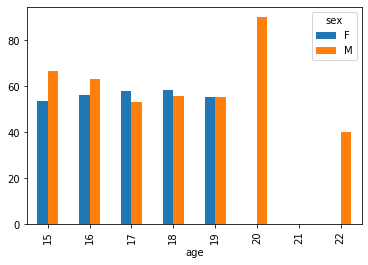

In [26]:
math_6.score.GP.plot.bar() # Рассмотрим тренды для каждой отдельной школы. В данном случае школа GP


В школе GP высокая успеваемость среди мальчиков  характерна для учеников младшего возраста. В 15-16 лет мальчики показывают лучшие результаты. Начниная с 17 лет результаты учеников в зависимости от возраста не изменяются. Для девочек ситуация иная: хорошо заметен тренд возрастания оценки при при увеличени возраста ученицы. Также заметно, что оценки мальчиков в возрасте до 17 лет существенно выше оценок девочек. В возрасте 17 - 19 лет оценки мальчиков и девочек примерно одинаковы. Это может быть связано с тем, что ученики мальчики, которые предполагают получить высшее образование уходят из школы после успешной сдачи экзамена, либо не сдают его повторно. Ученицы стараются получить требуемый бал для поступления и сдают его несколько раз. Учениц старше 19 лет в школе нет.  Также есть выпадающее из тренда значения для учеников 20 и 22 лет. Это мальчики. Узнаем какое количество учеников данного возраста  и проверим причину столь поздней сдачи экзамена

In [28]:
math_4[math_4.school]

AttributeError: 'DataFrame' object has no attribute 'school'

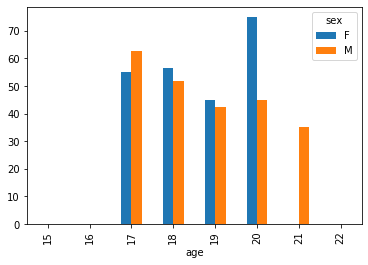

In [29]:
math_6.score.MS.plot.bar() # Анализируем оценку учеников школы MS


В школе MS также заметен тренд снижения успеваемости у мальчиков с возрастом. Также в более младшем возрасте мальчики имеют лучшую успеваемость. Девочкам требуется время для подготовки к экзамену. Также как и в предыдущей школе, вероятно дети, которые планируют получить высшее образование готовятся и сдают экзамен с первого-второго раза, и дальше сдают экзамен дети которые не планируют получать высшее образование, соответственно пропадает мотивация для сдачи экзамена на отличную оценку. Девушек,которые сдают экзамены старше 20 лет нет. 

Интересные результаты у учеников в возрасте 20 и старше. Мы уже знаем что суммарно их 5. Говорить о статистике не приходится. Посмотрим причину столь поздней сдачи экзамена

In [30]:
math_2[math_2.age>19]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0
306,GP,M,20,U,GT3,A,3.0,2.0,services,other,course,other,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,no,no,5.0,5.0,3.0,5.0,0.0,90.0
376,MS,F,20,NaN,GT3,T,4.0,2.0,health,other,course,NaN,2.0,3.0,2.0,no,yes,yes,no,no,-9.0,yes,yes,yes,5.0,4.0,3.0,3.0,4.0,75.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0


Анализ данных показывает, что единственный 22 летний ученик имеет серьезные проблемы со здоровьем и ученик не планирует получать высшее образование. Т.е. вероятной причиной столь поздней сдачи экзамена являются проблемы со здоровьем. Все 20 летние ученики хотят получить высшее образование. Вероятно экзамен сдавася для получения требуемого балла. Ученик, который получил наименьшее количество баллов из 20 летних, видимо не посещял занятия, так как имеет наибольшее количество пропущенных уроков 212. также оба родителя данного ученика яявляются госслужащими, может быть, получение высшего образования является в большей степени желанием родителей, а не самого ученика. Также стоит отметить что у всех учеников отличные отношения дома и у всех учеников достаточно свободного времени. 21 летний учник имеет также внеучебные проблемы (failures = 3), его родители закончили только 1-4 класса, что косвенно говорит о том, что вс семье низкий финансовый достаток.    У учеников, которые получили высший бал один из родителей имеет образование не ниже среднего специального.  

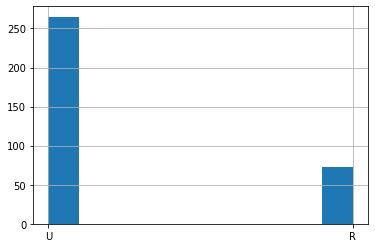

In [31]:
math_2['address'].hist()

## ---address--- ---traveltime---

In [33]:
math_address = math_2.groupby(['address', 'traveltime']).mean() # Посмотрим насколько коррелируются оценки в зависимости от удаленности дома ученика от школы

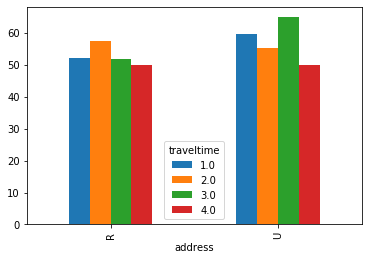

In [34]:
(math_address.unstack(1)).score.plot.bar()

Реультат можно интерпретировать следующим образом: ученики, которые проводят в пути больше часа имеют низшую успеваемость. Проверим сколько времени на обучение тратят ученики. 

In [37]:
display(math_2[math_2.traveltime == 4.0].studytime.value_counts())
display(math_2.studytime.value_counts())

1.0    3
2.0    2
3.0    1
4.0    1
Name: studytime, dtype: int64

2.0    173
1.0     90
3.0     58
4.0     24
Name: studytime, dtype: int64

In [38]:
math_2.address.describe()

count     338
unique      2
top         U
freq      265
Name: address, dtype: object

In [39]:
math_2.address.value_counts()

U    265
R     73
Name: address, dtype: int64

In [40]:
math_2.loc[:,['address']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  338 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [41]:
math_2.traveltime.describe()

count    329.000000
mean       1.428571
std        0.690907
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [42]:
math_2.traveltime.value_counts()

1.0    219
2.0     86
3.0     17
4.0      7
Name: traveltime, dtype: int64

In [43]:
math_2.school.value_counts()

GP    311
MS     41
Name: school, dtype: int64

## --- famsize --- 

In [44]:
math_2.famsize.value_counts()

GT3    228
LE3    100
Name: famsize, dtype: int64

Итого у нас 328 заполненных строк из 352. При этом, основную часть учащихся составляют ученики из больших семей. Проверим влияние размера семьи на оценки

In [47]:
math_famsize = math_2.groupby(['famsize']).mean()

In [48]:
math_famsize

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
famsize,,,,,,,,,,,,,
GT3,16.600877,2.850220,2.803738,1.390476,2.098655,0.268519,-6.295964,3.947867,3.192825,3.07489,3.545455,8.000000,57.609649
LE3,16.700000,2.717172,2.431579,1.489583,1.949495,0.291667,-5.848485,3.926316,3.252525,3.15625,3.400000,8.447917,58.500000


In [49]:
math_famsize.score

famsize
GT3    57.609649
LE3    58.500000
Name: score, dtype: float64

Разница в оценках студетов несущественна. Явные выводы сделать затруднительно. 

### --- Pstatsus ---

In [51]:
math_2.Pstatus.value_counts()

T    277
A     34
Name: Pstatus, dtype: int64

In [52]:
math_2.Pstatus.describe()

count     311
unique      2
top         T
freq      277
Name: Pstatus, dtype: object

In [54]:
math_2.loc[:,['Pstatus']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  311 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


Присутствует 311 строк из 352. Проанализируем зависимость статуса совместной жизни родителей на оценки детей

In [57]:
math_Pstatus = math_2.groupby(['Pstatus']).mean()

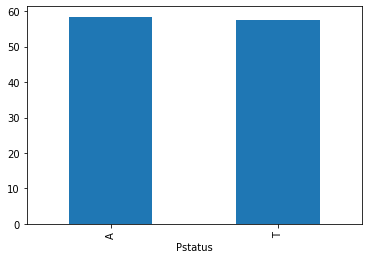

In [59]:
math_Pstatus.unstack(1).score.plot.bar()

In [60]:
math_Pstatus.score

Pstatus
A    58.382353
T    57.490975
Name: score, dtype: float64

Статус совместного жилья также не дает явной корреляции на оценку учащихся

## --- Medu---  ---Fedu---

In [67]:
display(math_2['Medu'].value_counts())
display(math_2.loc[:,['Medu']].info())

4.0    125
2.0     88
3.0     87
1.0     47
0.0      3
Name: Medu, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    350 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


None

In [ ]:
Данные об образовании мам студентов заполненны практически полностью 350 из 352

In [65]:
math_2['Fedu'].value_counts()

2.0     94
3.0     89
4.0     80
1.0     65
0.0      2
40.0     1
Name: Fedu, dtype: int64

In [68]:
display(math_2.loc[:,['Fedu']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    331 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


None

Значений данных об образовании отцов значительно меньше 331 из 352. Что может быть вызвано различными причинами, в том числе и не полноценностью семьи

Проверим корреляцию влияния образования родителей на оценки детей

In [69]:
math_Medu = math_2.groupby(['Medu']).mean()

In [70]:
math_Medu.score

Medu
0.0    65.000000
1.0    51.382979
2.0    56.363636
3.0    57.183908
4.0    61.640000
Name: score, dtype: float64

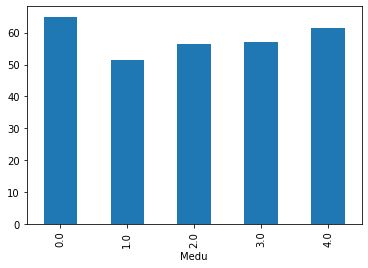

In [72]:
math_Medu.unstack(1).score.plot.bar()

Видим, что у детей чьи мамы имеют высшее образование или не имют образования вовсе оценки выше чем у остальных. однако для выводов о том что отсутствие образования у мамы на положительную оценку у ребенка требуется количество событий больше 10, а  в данном случае событий всего 3

In [74]:
math_Fedu = math_2.groupby(['Fedu']).mean()

In [76]:
math_Fedu.score

Fedu
0.0     65.000000
1.0     53.461538
2.0     57.819149
3.0     57.078652
4.0     61.250000
40.0    60.000000
Name: score, dtype: float64

In [77]:
# В датасете присутствует ошибка о которой мы уже писали ранее. Исправим ее

In [78]:
math_2[math_2.Fedu == 40.0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


In [80]:
math_2.loc[11,['Fedu']]=4.0

In [82]:
math_2.loc[11,['Fedu']]

Fedu    4
Name: 11, dtype: object

Повторим анализ для стобца Fedu

In [84]:
math_Fedu = math_2.groupby(['Fedu']).mean()

In [85]:
math_Fedu.score

Fedu
0.0    65.000000
1.0    53.461538
2.0    57.819149
3.0    57.078652
4.0    61.234568
Name: score, dtype: float64

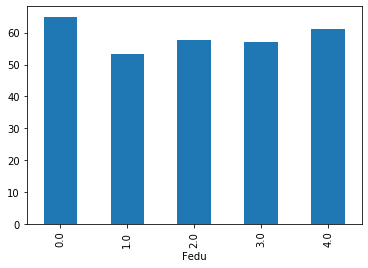

In [107]:
math_Fedu.score.plot.bar()

Ситуация с образованием отцов пародоксально сопостовима с образованием матерей. Проведем совместный анализ

In [102]:
math_MeduFedu = math_2.groupby(['Medu','Fedu']).mean()

In [103]:
math_MeduFedu = math_MeduFedu.unstack(1)

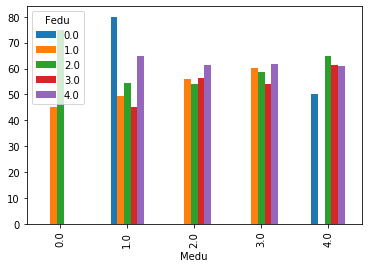

In [104]:
math_MeduFedu.score.plot.bar()

In [105]:
math_MeduFedu.unstack(1).score

Fedu  Medu
0.0   0.0           NaN
      1.0     80.000000
      2.0           NaN
      3.0           NaN
      4.0     50.000000
1.0   0.0     45.000000
      1.0     49.464286
      2.0     55.909091
      3.0     60.384615
      4.0           NaN
2.0   0.0     75.000000
      1.0     54.545455
      2.0     54.146341
      3.0     58.863636
      4.0     65.000000
3.0   0.0           NaN
      1.0     45.000000
      2.0     56.333333
      3.0     54.218750
      4.0     61.351351
4.0   0.0           NaN
      1.0     65.000000
      2.0     61.428571
      3.0     61.785714
      4.0     61.016949
dtype: float64

#### Результат свидетельствует о том, что в семьях, где хотя бы один из родителей имеет высшее образование дети получают высший был, по сравнению с детьми из семей, в которых родители не имеют высшего образования

Целочисленные значения баллов и сведения для семей, в которых хотя бы один из родителей не имел вообще никакого образования вообще не рассматривались. Хотя имеется пародоксально высокий бал у детей образованием отца 0 и матери 1.0, а также с образованием отца 2.0 и матери 0.0. Посмотрим их отдельно

In [96]:
math_2[(math_2.Fedu==0.0)&(math_2.Medu==1.0)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
171,GP,M,16,U,GT3,T,1.0,0.0,other,other,reputation,mother,2.0,2.0,NaN,no,yes,yes,yes,yes,-6.0,NaN,yes,yes,4.0,3.0,2.0,3.0,2.0,80.0


In [97]:
math_2[(math_2.Fedu==2.0)&(math_2.Medu==0.0)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
249,GP,M,16,U,GT3,T,0.0,2.0,other,other,other,mother,1.0,1.0,0.0,no,no,yes,no,NaN,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
324,GP,F,17,U,LE3,T,0.0,2.0,at_home,at_home,home,father,2.0,3.0,0.0,no,no,no,no,yes,-9.0,yes,yes,no,3.0,3.0,3.0,2.0,0.0,75.0


Как выясняется таких детей 3. Они являются сильными учениками в математике. Все проживают в городе. Все из школы GP. Все проживают в городе и живут достаточно близко к школе. У всех есть интернет. У всех неплохие отношения в семье. И двое из них хотят получить высшее образование. Третий вероятно тоже. Все не пропускали существенно количества занятий в школе. Ни у одного нет проблем вне школы

## --- Mjob---    ---Fjob---  ---Medu---  ---Fedu---

Проверим количество заполненых строк в столбцах

In [15]:
math_2.loc[:,['Mjob']].info()
math_2.loc[:,['Fjob']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    335 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    320 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


Значения заполнены не полностью 335 и 320 для матерей и отцов соответственно . Посмотрим сможем ли мы их заполнить. 

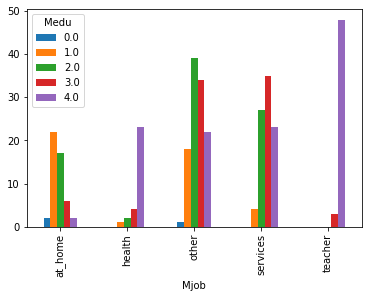

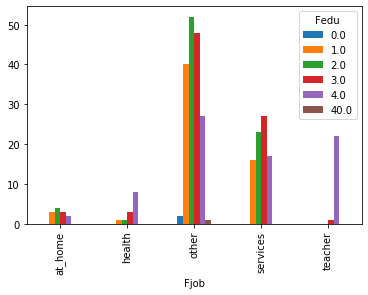

In [16]:
math_2.groupby(['Fjob']).Fedu.value_counts()
math_2.groupby(['Mjob']).Medu.value_counts()
(math_2.groupby(['Mjob']).Medu.value_counts()).unstack(1).plot.bar()
(math_2.groupby(['Fjob']).Fedu.value_counts()).unstack(1).plot.bar()

Анализ полученных данных корреляции места работы и образования показывает, что можно достаточно уверенно сказать, что если местом работы родителя явлется школа (teacher) или медицинское учрждение (health)(с меньшей вероятностью) то у родителя будет высшее образование. Можно проверить пустующие строки для родителей занятых в системах здравоохранения и образования. 
Заполнение остальных данных не предвидится возможным, так как нет корреляции между наличием образования и местом работы, однако, можно достаточно точно сказать, что если образование имеет значение 1.0 то женщина будет сидеть дома или работать не в сферах здравоохранения, госслужбы или образования (в other),  а мужчина вероятнее всего будет занят в other или services
также можно заметить, что в распределении существенно больше женщин - медиков, учителей и домохозяек. Мужчины же в основном заняты в other. 


Замением значение 40.0 в образования мужчин

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


C:\Users\Scheep\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


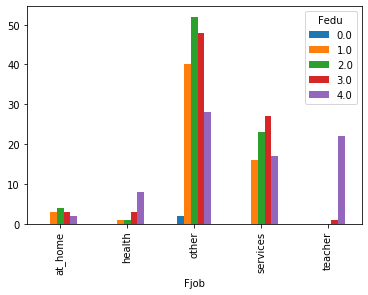

In [56]:
display(math_2[math_2.Fedu==40.0])
math_2.loc[math_2[math_2.Fedu==40.0].index,['Fedu']]=4.0
(math_2.groupby(['Fjob']).Fedu.value_counts()).unstack(1).plot.bar()


Просмотрим данные незаполненных значений для мам и пап

In [11]:
display(math_2[math_2.Fedu.isnull()])
display(math_2[math_2.Medu.isnull()])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
57,GP,M,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
58,GP,M,15,U,LE3,T,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
142,GP,F,15,U,GT3,T,4.0,NaN,teacher,services,course,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,-9.0,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
161,GP,M,15,R,GT3,T,3.0,NaN,other,NaN,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,-6.0,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0
180,GP,M,16,U,GT3,T,4.0,NaN,teacher,other,home,mother,1.0,2.0,0.0,no,NaN,yes,yes,yes,-6.0,yes,yes,no,3.0,4.0,3.0,3.0,10.0,40.0


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,GP,M,16,R,GT3,NaN,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0


In [57]:

# Для мам интересующих значений не найдено, а для пап - найдены
display((math_2[math_2.Fedu.isnull()])[math_2.Fjob == 'teacher'])
# Получаем 3 не заполненных значения для учителей
display((math_2[math_2.Fedu.isnull()])[math_2.Fjob == 'health'])
# Еще 2 незаполненных значения данные которых говорят о том, что у отцов высшее образование

C:\Users\Scheep\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
232,GP,M,17,U,GT3,T,4.0,NaN,teacher,teacher,reputation,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,2.0,14.0,45.0
287,GP,F,17,U,GT3,T,1.0,NaN,services,teacher,reputation,mother,1.0,3.0,0.0,no,yes,yes,no,yes,-9.0,yes,yes,no,4.0,3.0,3.0,3.0,6.0,60.0


C:\Users\Scheep\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
57,GP,M,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0


Получаем 3 не заполненных значения для учителей. Еще 2 незаполненных значения данные которых говорят о том, что у отцов высшее образование

In [58]:
math_2.loc[(math_2[math_2.Fedu.isnull()])[math_2.Fjob == 'teacher'].index,['Fedu']]=4.0

C:\Users\Scheep\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Scheep\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [59]:
math_2.loc[(math_2[math_2.Fedu.isnull()])[math_2.Fjob == 'health'].index,['Fedu']]=4.0

C:\Users\Scheep\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


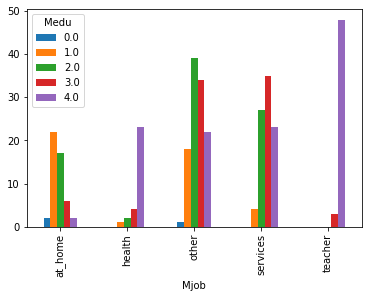

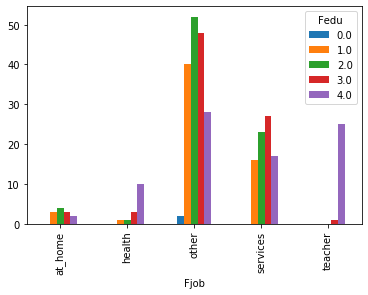

In [60]:
math_2.groupby(['Fjob']).Fedu.value_counts()
math_2.groupby(['Mjob']).Medu.value_counts()
(math_2.groupby(['Mjob']).Medu.value_counts()).unstack(1).plot.bar()
(math_2.groupby(['Fjob']).Fedu.value_counts()).unstack(1).plot.bar()

## --- reason---

In [16]:
display(math_2.reason.value_counts())
display(math_2.loc[:,['reason']].info())
display(math_2[math_2.reason == 'course'].school.value_counts())

course        119
reputation     96
home           89
other          33
Name: reason, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  337 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB


None

GP    103
MS     16
Name: school, dtype: int64

Получили 337 заполненных значений из 352. Посмотрим какие значение не вошли в датасет
Корреляции между выбором курса и названием школы нет 

In [55]:
display(math_2[math_2.reason.isnull()])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
33,GP,M,15,U,LE3,T,3.0,3.0,other,other,NaN,mother,1.0,2.0,0.0,no,NaN,no,yes,no,-6.0,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0
63,GP,F,16,U,GT3,NaN,4.0,3.0,teacher,health,NaN,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,-9.0,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,NaN,mother,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
77,GP,F,16,U,GT3,T,2.0,2.0,other,other,NaN,mother,1.0,4.0,0.0,no,no,yes,no,yes,-12.0,yes,yes,yes,5.0,2.0,3.0,3.0,0.0,55.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,NaN,NaN,1.0,2.0,1.0,no,no,no,no,yes,-6.0,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
185,GP,M,17,U,GT3,T,3.0,3.0,services,services,NaN,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,NaN,yes,4.0,3.0,4.0,4.0,12.0,55.0
186,GP,M,16,U,GT3,NaN,1.0,2.0,services,services,NaN,mother,1.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,yes,yes,3.0,3.0,3.0,3.0,2.0,55.0
196,GP,M,17,U,GT3,T,4.0,4.0,services,teacher,NaN,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,yes,no,5.0,2.0,3.0,5.0,4.0,80.0
263,GP,F,17,U,GT3,T,3.0,3.0,other,other,NaN,mother,1.0,3.0,0.0,no,no,NaN,yes,no,-9.0,yes,no,no,3.0,2.0,3.0,4.0,4.0,45.0


Видна корреляция между rtaveltime и reason и с чего можно сделать вывод о том что школа была выбрана исходя из близости к дому

In [56]:
display(math_2.groupby(['reason']).traveltime.value_counts())

reason      traveltime
course      1.0           70
            2.0           27
            3.0            8
            4.0            5
home        1.0           57
            2.0           23
            3.0            2
            4.0            2
other       1.0           21
            2.0            7
            3.0            3
reputation  1.0           58
            2.0           28
            3.0            4
Name: traveltime, dtype: int64

 Предположение о корреляции не подтверждается. Заполнить пропущенные значения не получается 

## --- guardian---

In [58]:
display(math_2.guardian.value_counts())
display(math_2.loc[:,['guardian']].info())

mother    225
father     78
other      20
Name: guardian, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  323 non-null    object
dtypes: object(1)
memory usage: 15.5+ KB


None

получили 323 из 352 заполненных значений. Посмотрим на незаполненные

In [59]:
display(math_2[math_2.guardian.isnull()])
display(math_2.groupby(['guardian']).Pstatus.value_counts()) # Смотрим как часто опекун состоит в браке. Есть идея заполнить исходя из данных о совместном проживании

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,course,NaN,1.0,3.0,0.0,yes,NaN,yes,yes,yes,-9.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
41,GP,M,15,U,LE3,T,4.0,4.0,teacher,other,home,NaN,1.0,1.0,0.0,no,yes,no,no,no,-3.0,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0
49,GP,F,15,U,GT3,T,4.0,4.0,services,teacher,other,NaN,1.0,2.0,1.0,yes,yes,no,yes,no,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,2.0,35.0
53,GP,F,15,U,GT3,T,4.0,4.0,services,services,course,NaN,1.0,1.0,0.0,yes,yes,yes,no,yes,-3.0,yes,yes,no,3.0,3.0,4.0,5.0,0.0,55.0
60,GP,F,16,R,GT3,T,4.0,4.0,health,teacher,other,NaN,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0
81,GP,M,15,U,GT3,NaN,2.0,3.0,other,other,home,NaN,1.0,3.0,0.0,yes,no,NaN,NaN,no,-9.0,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0
90,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,NaN,1.0,3.0,0.0,no,yes,yes,no,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,4.0,0.0,40.0
98,GP,F,16,U,GT3,T,4.0,4.0,other,other,reputation,NaN,1.0,1.0,0.0,no,NaN,no,yes,no,-3.0,yes,NaN,no,5.0,3.0,4.0,1.0,6.0,70.0
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,NaN,NaN,1.0,2.0,1.0,no,no,no,no,yes,-6.0,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,NaN,4.0,2.0,3.0,no,no,NaN,yes,yes,-6.0,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0


guardian  Pstatus
father    T           65
          A            3
mother    T          172
          A           27
other     T           14
          A            3
Name: Pstatus, dtype: int64

Заполнить пропуски не предвидется возможным

## ---traveltime---

In [61]:
display(math_2.traveltime.value_counts())
display(math_2.loc[:,['traveltime']].info())

1.0    219
2.0     86
3.0     17
4.0      7
Name: traveltime, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  329 non-null    float64
dtypes: float64(1)
memory usage: 15.5 KB


None

получили 329 из 352 заполненных значений. Посмотрим на незаполненные

In [63]:
display(math_2[math_2.traveltime.isnull()])
display(math_2.groupby(['reason','address']).traveltime.value_counts())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,-3.0,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,NaN,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,NaN,1.0,0.0,NaN,yes,no,yes,yes,-3.0,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
37,GP,M,16,R,GT3,A,4.0,4.0,other,teacher,reputation,mother,NaN,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,-6.0,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
70,GP,M,16,U,GT3,T,3.0,1.0,other,other,reputation,father,NaN,4.0,0.0,no,yes,yes,no,yes,-12.0,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
104,GP,M,15,U,GT3,A,3.0,4.0,NaN,other,course,mother,NaN,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
132,GP,F,17,U,LE3,T,2.0,2.0,other,other,course,father,NaN,1.0,0.0,no,yes,no,no,yes,-3.0,yes,NaN,yes,3.0,4.0,4.0,5.0,12.0,60.0


reason      address  traveltime
course      R        1.0           13
                     2.0            6
                     3.0            5
                     4.0            2
            U        1.0           55
                     2.0           19
                     3.0            3
                     4.0            3
home        R        1.0            4
                     2.0            2
                     3.0            2
                     4.0            2
            U        1.0           50
                     2.0           20
other       R        1.0            3
                     2.0            3
                     3.0            2
            U        1.0           18
                     2.0            3
                     3.0            1
reputation  R        1.0           11
                     2.0           11
                     3.0            1
            U        1.0           46
                     2.0           16
                  

In [61]:
# Если дети живут в городе, то  можно заменить traveltime на 2.0 или 1.0 проверим количество живущих в городе с незаполненными значениями
display(math_2[math_2.traveltime.isnull()][(math_2.address == 'U')&(math_2.reason=='home')])

C:\Users\Scheep\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,-3.0,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,NaN,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
234,GP,M,16,U,LE3,NaN,1.0,1.0,other,other,home,mother,NaN,2.0,0.0,no,NaN,yes,no,yes,-6.0,yes,yes,no,3.0,4.0,2.0,5.0,18.0,30.0


Таких учеников всего трое. 26,30,234

## ---studytime---

In [44]:
display(math_2.studytime.value_counts())
display(math_2.loc[:,['studytime']].info())

2.0    173
1.0     90
3.0     58
4.0     24
Name: studytime, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  345 non-null    float64
dtypes: float64(1)
memory usage: 15.5 KB


None

получили 323 из 352 заполненных значений. Посмотрим на незаполненные

In [45]:
display(math_2[math_2.studytime.isnull()])
display(math_2.groupby(['studytime']).traveltime.value_counts())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
266,GP,M,17,U,GT3,NaN,3.0,1.0,services,NaN,other,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,NaN,5.0,4.0,4.0,NaN,2.0,50.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,NaN,2.0,no,no,no,no,no,NaN,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0


studytime  traveltime
1.0        1.0            50
           2.0            25
           3.0             7
           4.0             3
2.0        1.0           109
           2.0            43
           3.0             8
           4.0             2
3.0        1.0            39
           2.0            12
           3.0             1
           4.0             1
4.0        1.0            16
           2.0             6
           4.0             1
Name: traveltime, dtype: int64

данные заполнены почти полностью. Всего 7 пропущенных значений из 352. Оценка всех учеников выше среднего. Заполнить пропущенные значения не предвидится возможным

## --- failures ---

In [20]:
display(math_2.failures.value_counts())
display(math_2.loc[:,['failures']].info())

0.0    273
1.0     38
2.0     11
3.0     10
Name: failures, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  332 non-null    float64
dtypes: float64(1)
memory usage: 15.5 KB


None

получили 332 из 352 заполненных значений. Посмотрим на незаполненные

In [21]:
display(math_2[math_2.failures.isnull()])
display(math_2.groupby(['failures']).freetime.value_counts())
display(math_2.groupby(['failures']).score.mean())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,4.0,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,-6.0,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,-6.0,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
107,GP,M,16,U,GT3,T,3.0,3.0,services,NaN,home,father,1.0,3.0,NaN,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,3.0,3.0,5.0,2.0,90.0
108,GP,M,15,R,GT3,NaN,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,-12.0,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
114,GP,M,15,R,NaN,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,-6.0,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,1.0,2.0,NaN,no,yes,no,yes,yes,-6.0,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
125,GP,M,15,U,GT3,T,3.0,4.0,services,services,home,father,1.0,1.0,NaN,yes,no,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,0.0,60.0


failures  freetime
0.0       3.0         112
          4.0          74
          2.0          47
          5.0          23
          1.0          11
1.0       4.0          18
          3.0           7
          5.0           5
          1.0           4
          2.0           4
2.0       4.0           4
          2.0           3
          3.0           2
          5.0           1
3.0       5.0           4
          3.0           3
          4.0           2
          2.0           1
Name: freetime, dtype: int64

failures
0.0    59.542125
1.0    50.526316
2.0    44.090909
3.0    41.500000
Name: score, dtype: float64

Отчетливо виден тренд снижения средней оценки ученика в зависимости от количества внеучебных 'неудач'

Проверим оставшиеся значения

In [22]:
math_2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,352.000000,350.000000,336.000000,329.000000,345.000000,332.000000,345.000000,328.000000,344.000000,346.000000,339.000000,342.000000,352.000000
mean,16.633523,2.811429,2.571429,1.428571,2.046377,0.271084,-6.139130,3.942073,3.235465,3.086705,3.516224,8.090643,57.755682
std,1.256011,1.091192,1.087632,0.690907,0.840919,0.667779,2.522758,0.921871,1.004258,1.091998,1.412812,24.704600,16.200928
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,20.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,2.000000,45.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,4.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [23]:
math_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               352 non-null    object 
 1   sex                  352 non-null    object 
 2   age                  352 non-null    int64  
 3   address              338 non-null    object 
 4   famsize              328 non-null    object 
 5   Pstatus              311 non-null    object 
 6   Medu                 350 non-null    float64
 7   Fedu                 336 non-null    float64
 8   Mjob                 335 non-null    object 
 9   Fjob                 320 non-null    object 
 10  reason               337 non-null    object 
 11  guardian             323 non-null    object 
 12  traveltime           329 non-null    float64
 13  studytime            345 non-null    float64
 14  failures             332 non-null    float64
 15  schoolsup            343 non-null    obj

Видим отсутствие описания колонки 'studytime, granuular'. Одновременно с этим ее сложно интерпретировать. Удалим ее. Видно выпадающее значение -1.0 для колонки famrel. Изменим на 1.0. Видим выпадающее значение absences 382. Проверим данную колонку. 

In [62]:
math_2.drop(['studytime, granular'], axis=1, inplace = True)

C:\Users\Scheep\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
math_2.columns # Проверяем отстутствие колонки

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

In [47]:
math_2[math_2.famrel==-1.0].famrel 

25   -1.0
Name: famrel, dtype: float64

## ---famrel---

In [63]:
math_2[math_2.famrel==-1.0].famrel = 1.0

C:\Users\Scheep\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [64]:
math_2.loc[math_2[math_2.famrel==-1.0].index,['famrel']] = 1.0

C:\Users\Scheep\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
math_2[math_2.famrel==-1.0].index


Int64Index([], dtype='int64')

## ---absences---

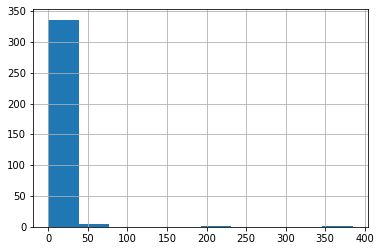

In [32]:
math_2.absences.hist()

видим два выпадающих значения, которые больше 200. Узнаем, что это  за студенты

In [89]:
math_2[math_2.absences >150]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


Проанализируем влияние количества пропусков на оценку

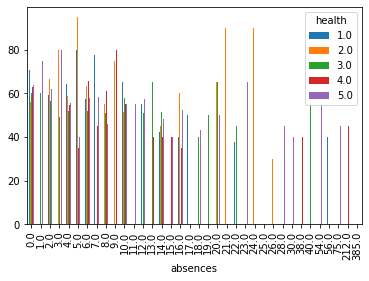

In [102]:
(math_2.groupby(['absences','health']).score.mean()).unstack(1).plot.bar()

Было бы уважительно пропускать уроки по состоянию здоровья. Но никакой корреляции нет. 

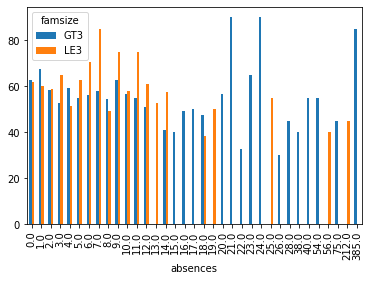

In [109]:
(math_2.groupby(['absences','famsize']).score.mean()).unstack(1).plot.bar()

### Можно сказать что школу чаще пропускают дети из больших семей

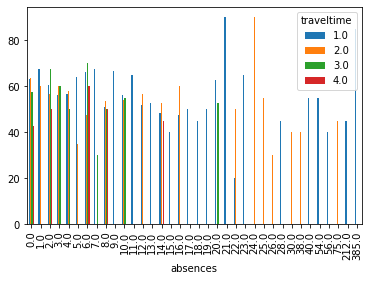

In [110]:
(math_2.groupby(['absences','traveltime']).score.mean()).unstack(1).plot.bar()

### При этом эти дети живут рядом со школой

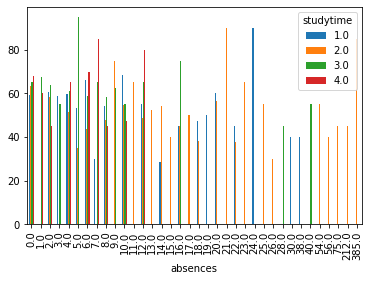

In [111]:
(math_2.groupby(['absences','studytime']).score.mean()).unstack(1).plot.bar()

### И не тратят много времени на учебу. 

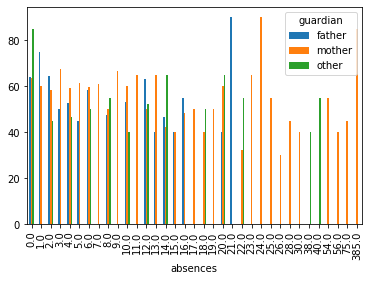

In [115]:
(math_2.groupby(['absences','guardian']).score.mean()).unstack(1).plot.bar()

### а также их опекунами ялвяются мамы. мамам в больших семьях нужно помогать. ничего не поделаешь

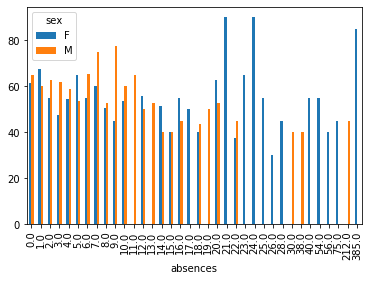

In [117]:
(math_2.groupby(['absences','sex']).score.mean()).unstack(1).plot.bar()

Особенно если ты еще и дочка

Но при этом еще и способная к математике девочка. 
Но вот если ты мальчик и пропускад много занятий, то усидчивости у тебя никакой. Самостоятельно с книжками мальчики не сидят. Экзамен будет провален. Поэтому мальчикам важно посещать школу. 

### Но вот если ты мальчик и пропускад много занятий, то усидчивости у тебя никакой. Самостоятельно с книжками мальчики не сидят. Экзамен будет провален. Поэтому мальчикам важно посещать школу. 

Видимо у девочек и мальчиков значительно отличаются тренды. Вероятно, для понимания проблем в образовании нужно разделить мальчиков и девочек. И рассматривать их результаты отдельно

In [33]:
math_2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,352.000000,350.000000,336.000000,329.000000,345.000000,332.000000,328.000000,344.000000,346.000000,339.000000,342.000000,352.000000
mean,16.633523,2.811429,2.571429,1.428571,2.046377,0.271084,3.948171,3.235465,3.086705,3.516224,8.090643,57.755682
std,1.256011,1.091192,1.087632,0.690907,0.840919,0.667779,0.895314,1.004258,1.091998,1.412812,24.704600,16.200928
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,2.000000,45.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


25-й перцентиль: 2.0, 75-й перцентиль: 7.0, IQR: 5.0,  Границы выбросов: [-5.5, 14.5].


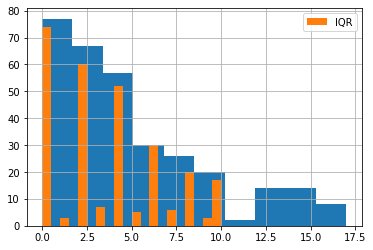

In [35]:
# Удалим выпадающие значения для колонки ---- absences----
math_2.absences.hist()
#median = math_2.absences.median()
#IQR = math_2.absences.quantile(0.75) - math_2.absences.quantile(0.25) 
#perc25 = math_2.absences.quantile(0.25)
#perc75 = math_2.absences.quantile(0.75)
#print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)  , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR)) 
#math_2.absences.loc[math_2.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 20, range = (0, 10), label = 'IQR') 
#plt.legend();
# Отфильтруем значения
#math_2 = math_2.loc[math_2.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)] 

Все же логично не удалять и не сортировать датасет по absences

## Проверим значения score

25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5].


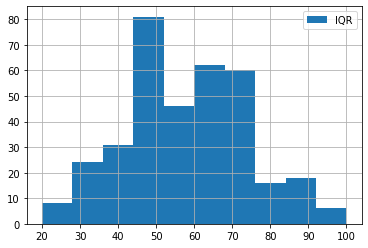

In [48]:
median = math_2.score.median()
IQR = math_2.score.quantile(0.75) - math_2.score.quantile(0.25) 
perc25 = math_2.score.quantile(0.25)
perc75 = math_2.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)  , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR)) 
math_2.score.loc[math_2.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(label = 'IQR') 
plt.legend();

## ВЫВОД ИЗ ВХОДНОГО АНАЛИЗА ДАННЫХ:

### ПСИХОЛОГИЯ И ЖИЗНЬ МАЛЬЧИКОВ И ДЕВОЧЕК ВИДИМО СИЛЬНО ОТЛИЧАЕТСЯ. НЕ ИМЕЕТ СМЫСЛА АНАЛИЗИРОВАТЬ ПОЛУЧЕННЫЙ ДАТАСЕТ И ДЛЯ МАЛЬЧИКОВ И ДЛЯ ДЕВОЧЕК. ДЛЯ КОРРЕКТНОГО АНАЛИЗА НУЖНО РАЗДЕЛИТЬ ДАННЫЕ

## Проведем корреляционный анализ 'количественных' данных

In [65]:
math_2m = math_2[math.sex == 'M']
math_2f = math_2[math.sex == 'F']

C:\Users\Scheep\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Scheep\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [77]:
(math_2m.corr()).sort_values('score')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
failures,0.320802,-0.244895,-0.341153,0.226136,-0.218713,1.000000,0.131259,0.273201,0.262156,0.040369,0.245630,-0.397395
age,1.000000,-0.174135,-0.187578,0.061347,-0.137123,0.320802,0.059697,0.006612,0.189052,-0.057390,0.282737,-0.318878
goout,0.189052,0.043153,0.041177,0.114290,0.008606,0.262156,-0.040663,0.185313,1.000000,0.045953,0.149332,-0.243421
absences,0.282737,-0.000114,-0.003176,-0.032403,-0.018896,0.245630,0.058003,0.121139,0.149332,0.017266,1.000000,-0.186936
traveltime,0.061347,-0.207514,-0.233195,1.000000,-0.107797,0.226136,-0.105180,0.008336,0.114290,-0.106389,-0.032403,-0.182227
health,-0.057390,-0.041626,-0.015780,-0.106389,-0.118035,0.040369,0.188464,0.079419,0.045953,1.000000,0.017266,-0.057820
freetime,0.006612,0.030381,-0.095334,0.008336,-0.013853,0.273201,0.172497,1.000000,0.185313,0.079419,0.121139,-0.016930
famrel,0.059697,-0.013245,-0.003996,-0.105180,-0.020306,0.131259,1.000000,0.172497,-0.040663,0.188464,0.058003,0.011054
studytime,-0.137123,0.142414,0.058290,-0.107797,1.000000,-0.218713,-0.020306,-0.013853,0.008606,-0.118035,-0.018896,0.164814
Fedu,-0.187578,0.628439,1.000000,-0.233195,0.058290,-0.341153,-0.003996,-0.095334,0.041177,-0.015780,-0.003176,0.217078


### Для мальчиков характерное влияние на оценку имеют возраст, образование отца и матери, количество внеучебных ошибок, количество пропусков занятий.
 Т.е.
### Чем младше юноша тем вероятнее он лучше сдаст экзамен
### Чем более образованные родители тем лучше сдаст экзамен 
### Чем ближе юноша живет к школе тем лучше он учится
### Чем больше юноша посвещает время учебе - тем выше оценка
### Самое сильное влияние на учебу юноши имеет количество внеучебных проблем. Чем больше проблем - тем хуже учеба
### Отношения в семье не влияют на учебу
### Количество свободного времени не влияет на учебу
### Чем больше юноша проводит времени с друзьями - тем хуже экзаменационная оценка
### Состояние здоровья не оправдание плохой экзаменационной оценки 
### Мальчикам лучше ходить в школу, а не пропускать занятия. Иначе экзамен будет сдан плохо.
### Влияние на оценку в порядке убЫвания для мальчиков: failures, age, goout, absences,  Medu, Fedu, studytime
### В группе риска в основном юноши, у которых есть внеучебные проблемы, которые пропускают много занятий и проводят много времени с друзьями. 


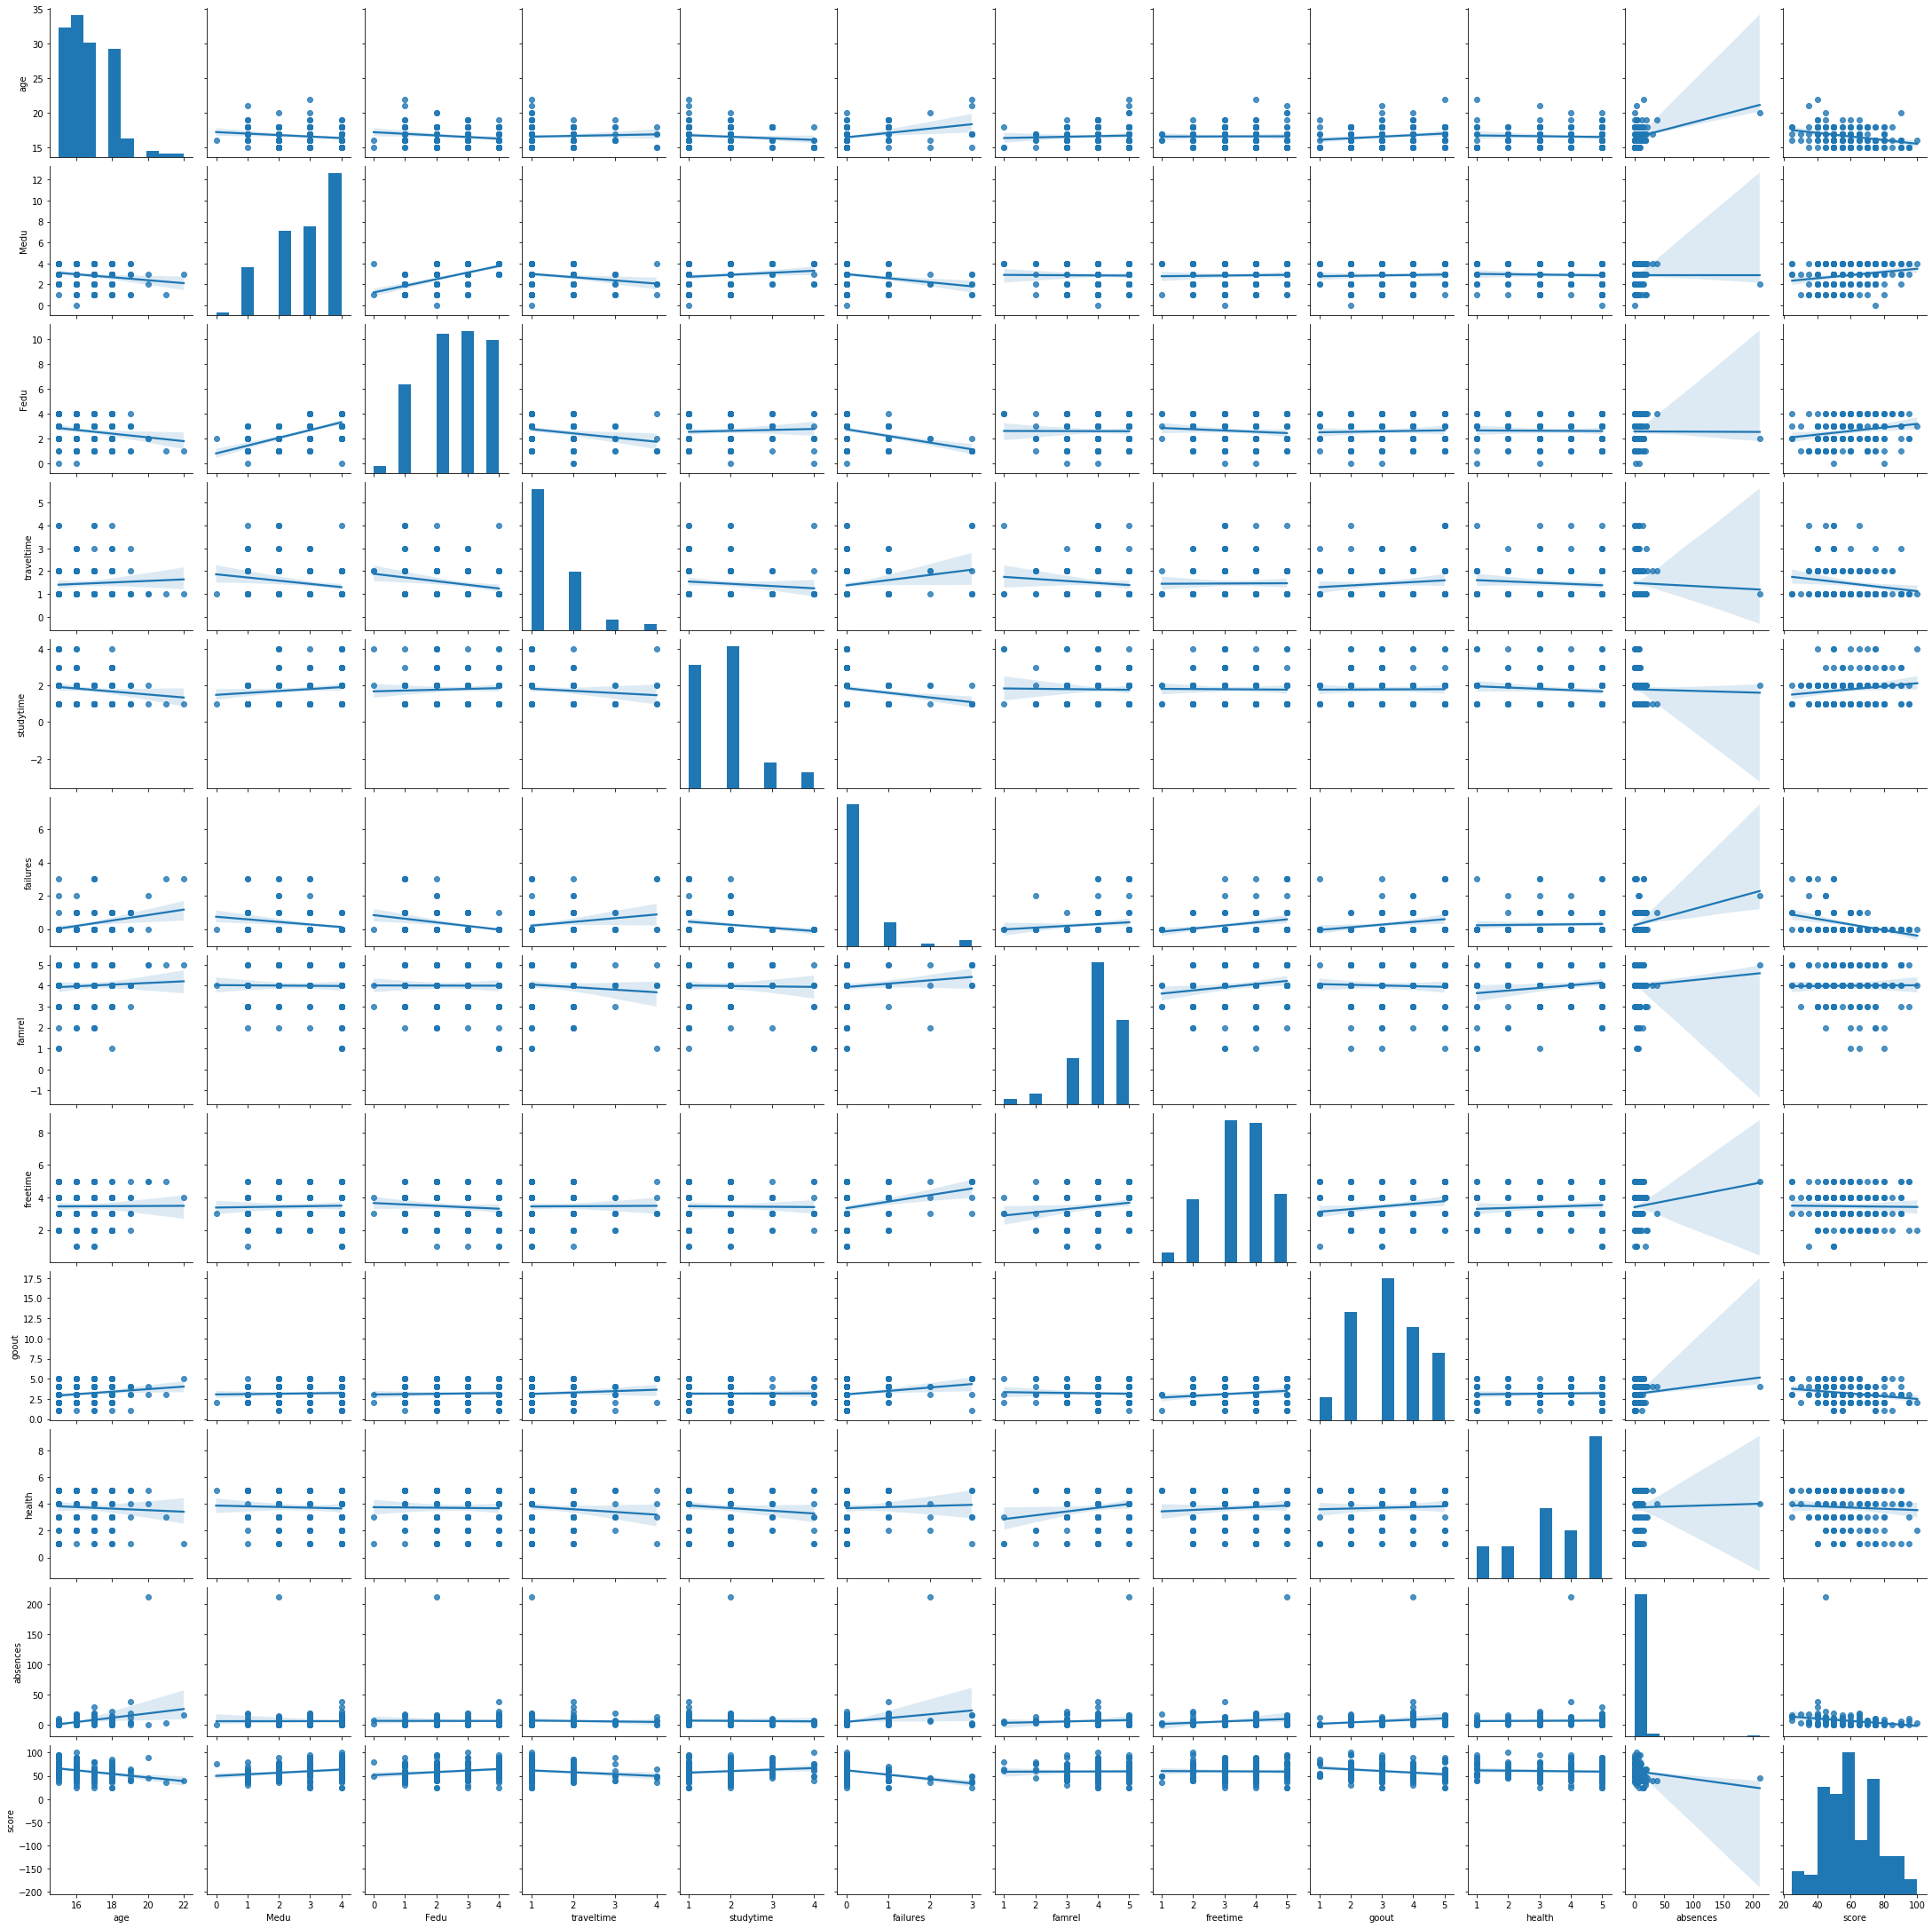

In [74]:
display(sns.pairplot(math_2m, kind = 'reg'))

In [75]:
math_2f.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.066128,-0.089737,0.140785,0.109144,0.141517,0.086375,0.009441,0.052962,-0.046062,0.016370,0.076874
Medu,-0.066128,1.000000,0.578310,-0.125402,0.043582,-0.173184,-0.003486,-0.009544,0.111114,-0.053507,-0.038945,0.137660
Fedu,-0.089737,0.578310,1.000000,-0.078978,-0.066127,-0.210654,-0.026947,0.032569,0.041246,0.058516,0.026202,0.071970
traveltime,0.140785,-0.125402,-0.078978,1.000000,-0.066256,-0.060913,0.040138,-0.085808,-0.076541,0.088826,-0.056302,0.026188
studytime,0.109144,0.043582,-0.066127,-0.066256,1.000000,-0.081853,0.163172,-0.134790,-0.033478,0.024822,-0.063305,0.200157
failures,0.141517,-0.173184,-0.210654,-0.060913,-0.081853,1.000000,-0.111593,-0.039092,-0.019704,0.082611,0.011788,-0.191839
famrel,0.086375,-0.003486,-0.026947,0.040138,0.163172,-0.111593,1.000000,0.128038,0.119147,0.026943,-0.168806,0.058617
freetime,0.009441,-0.009544,0.032569,-0.085808,-0.134790,-0.039092,0.128038,1.000000,0.401017,0.016960,-0.039747,-0.059219
goout,0.052962,0.111114,0.041246,-0.076541,-0.033478,-0.019704,0.119147,0.401017,1.000000,-0.083082,-0.162266,-0.137398
health,-0.046062,-0.053507,0.058516,0.088826,0.024822,0.082611,0.026943,0.016960,-0.083082,1.000000,-0.020962,-0.122958


для девочек на оценку по математике влияет только количесвто внеучбных проблем и количество времени проведенного за учебой, образование матери,

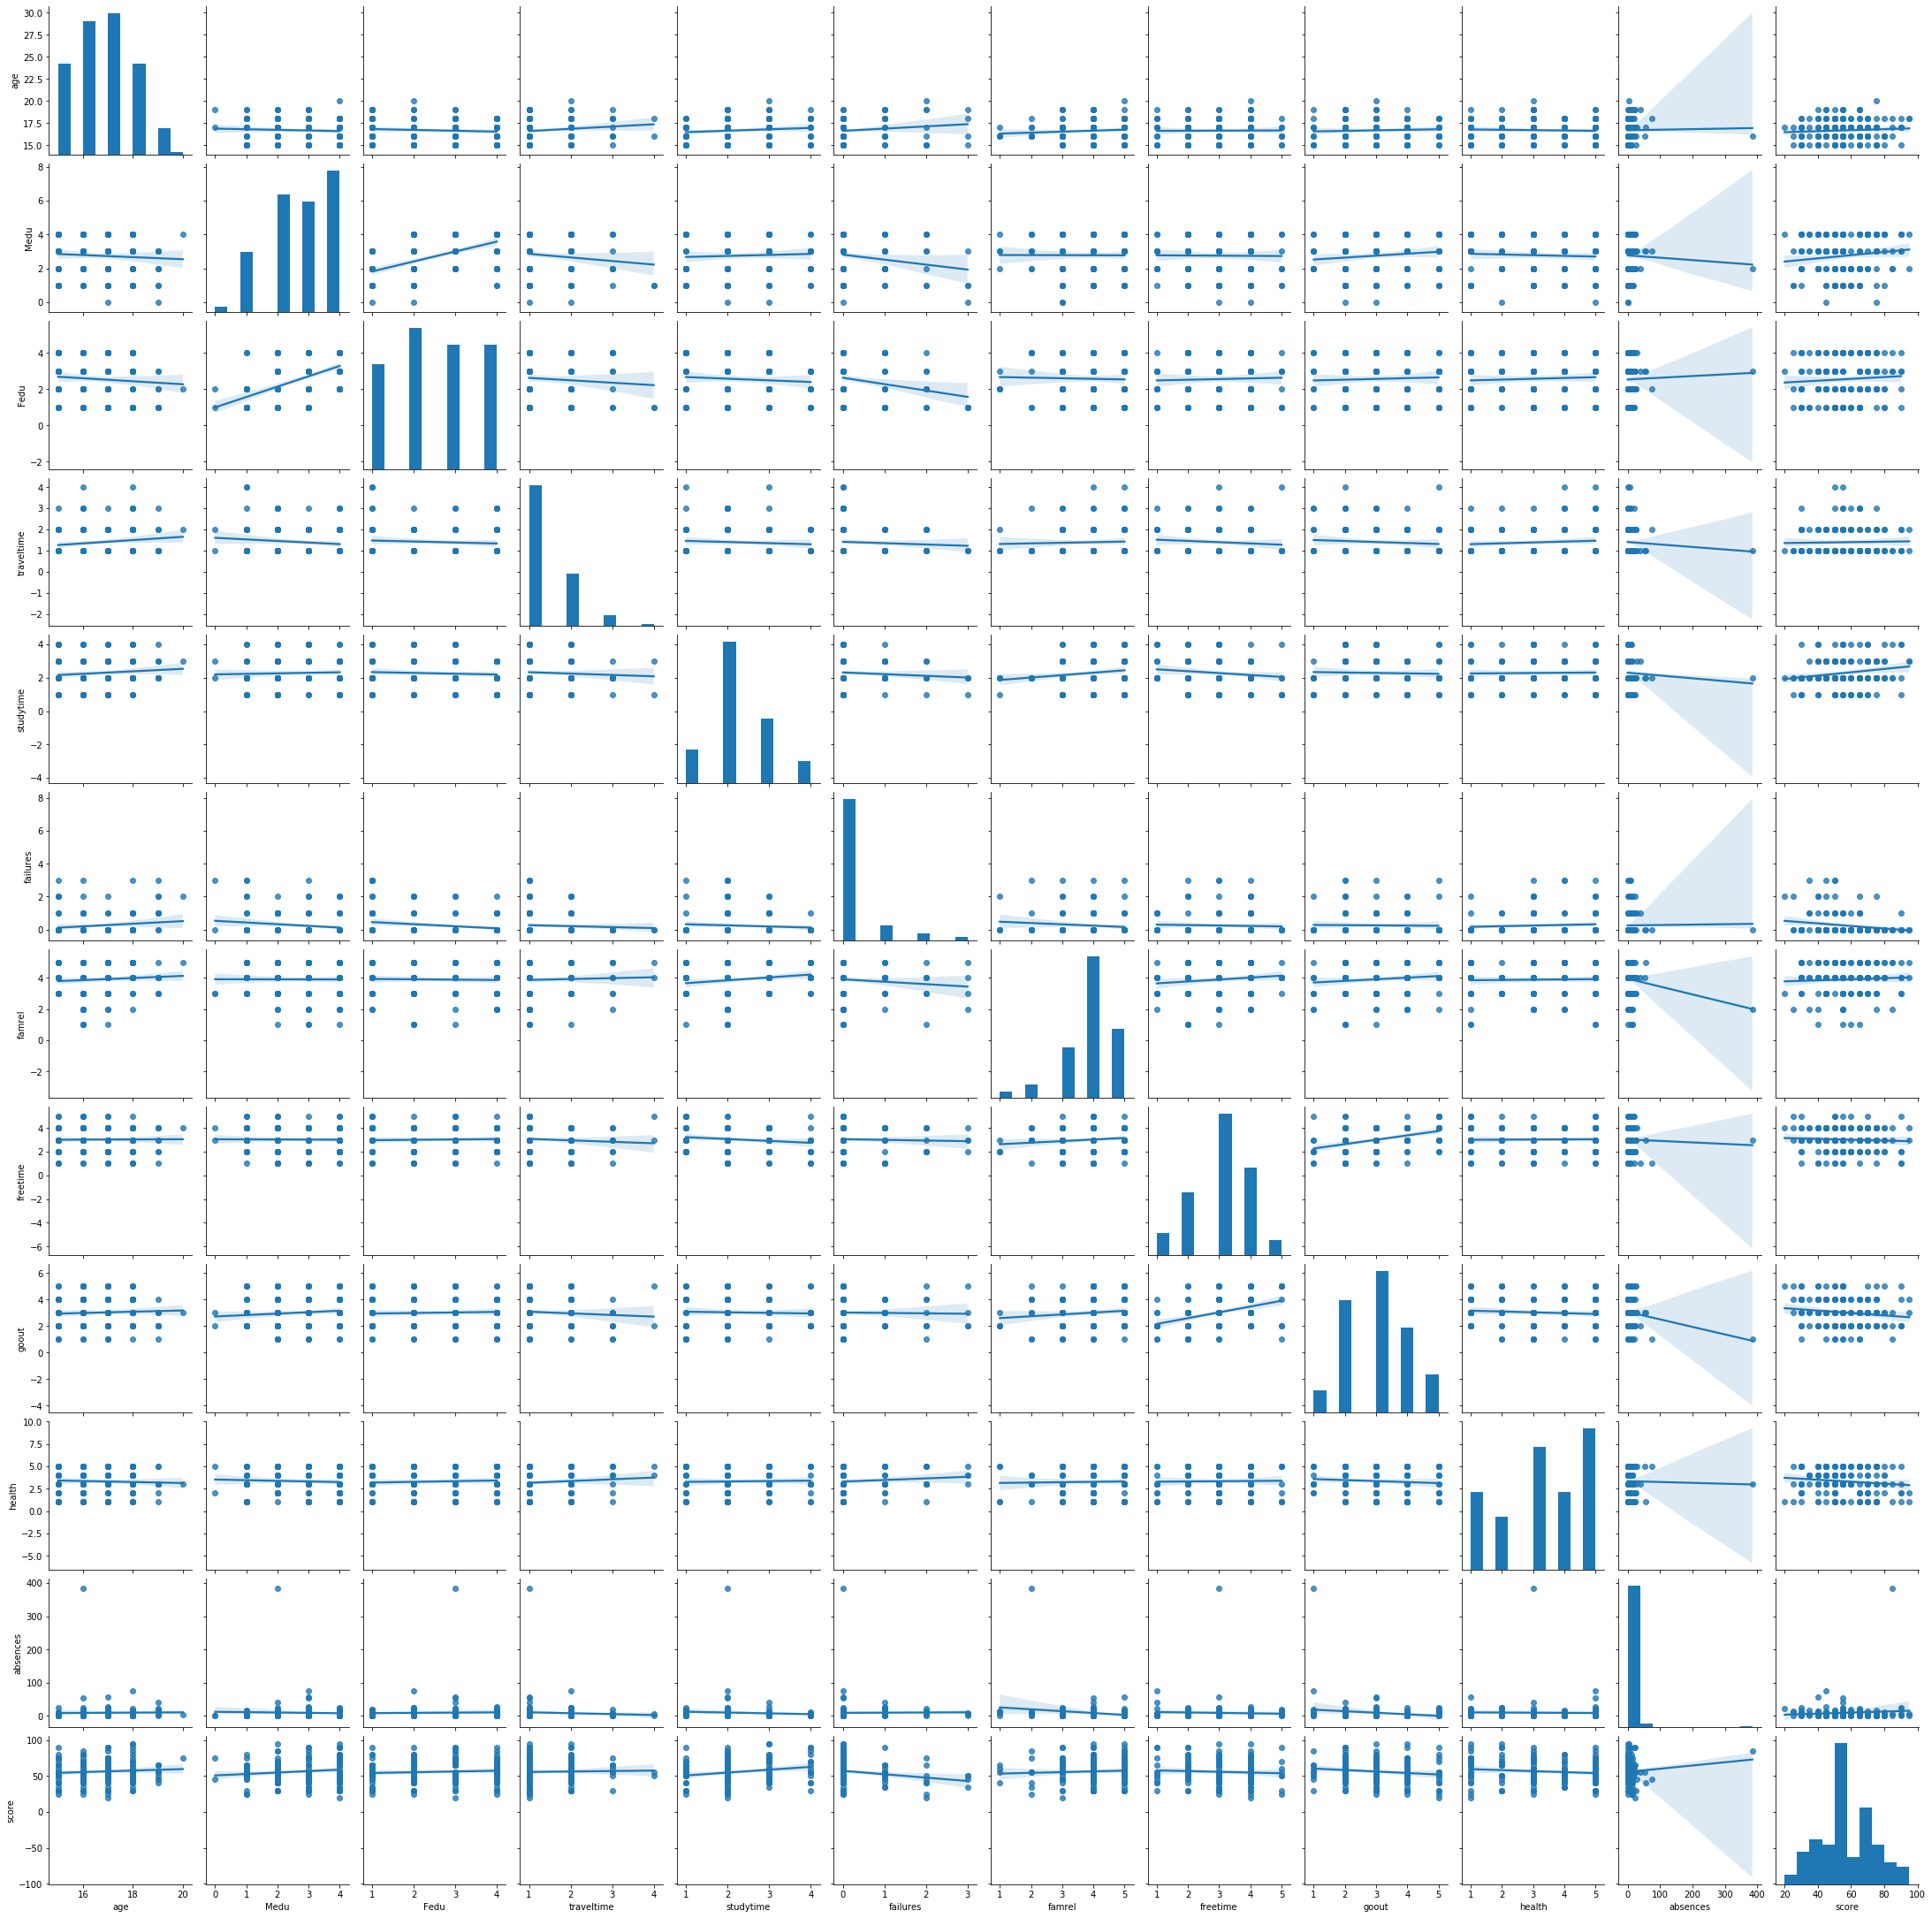

In [78]:
display(sns.pairplot(math_2f, kind = 'reg'))

## Проверка номинативных переменных для мальчиков

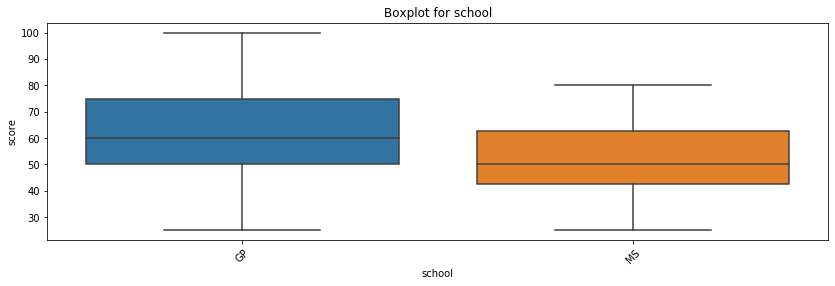

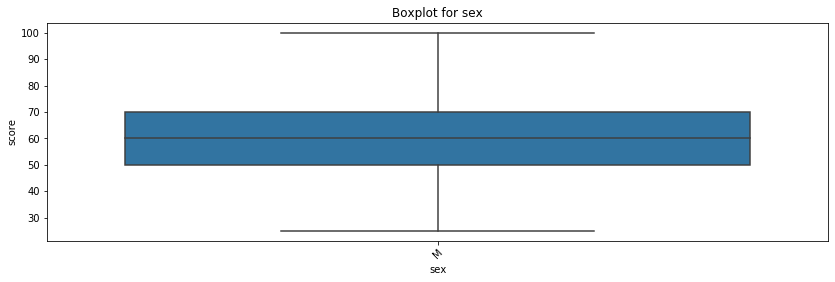

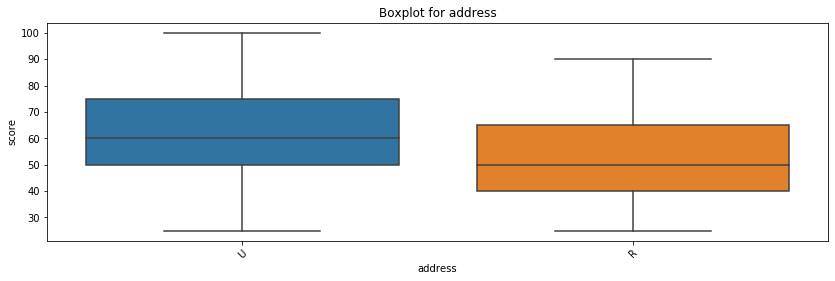

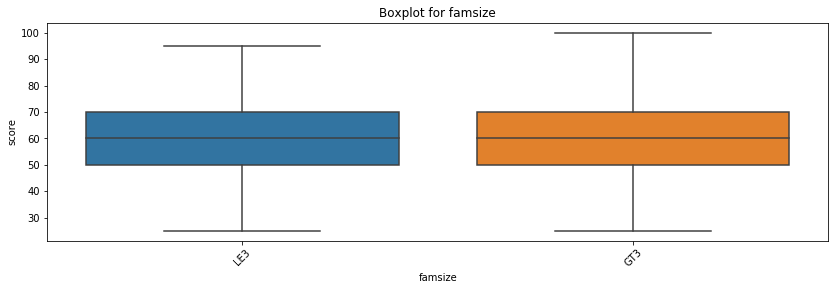

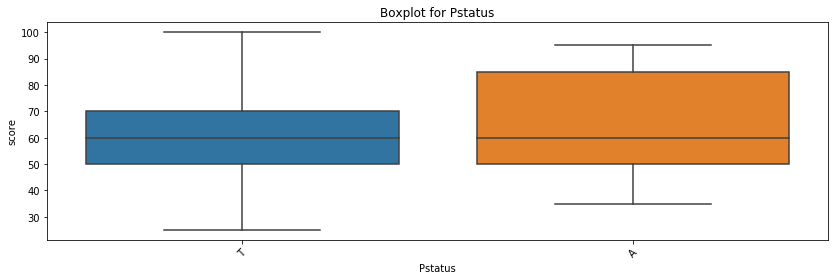

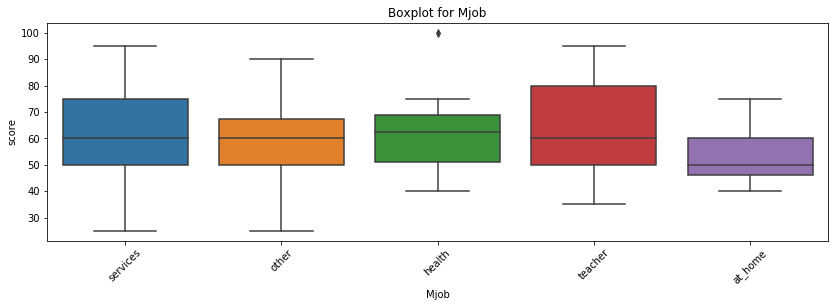

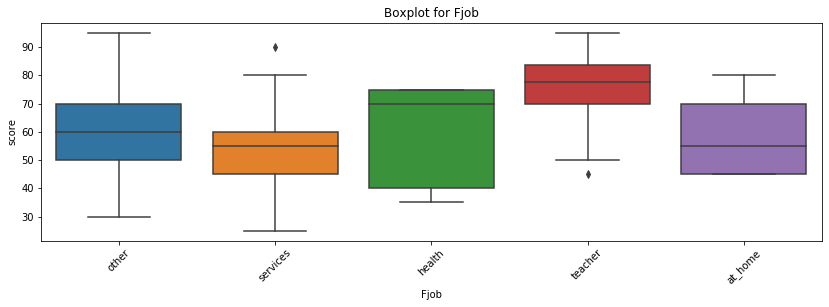

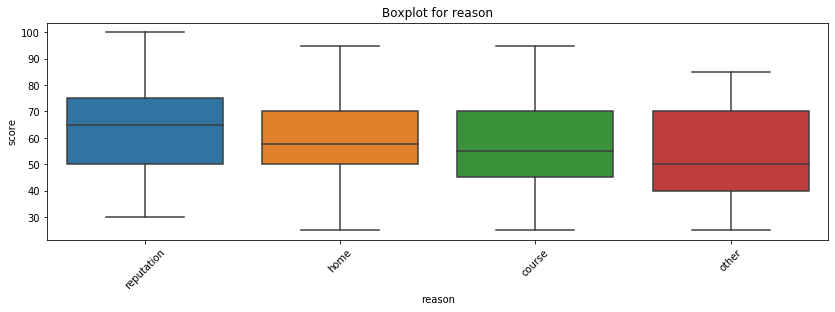

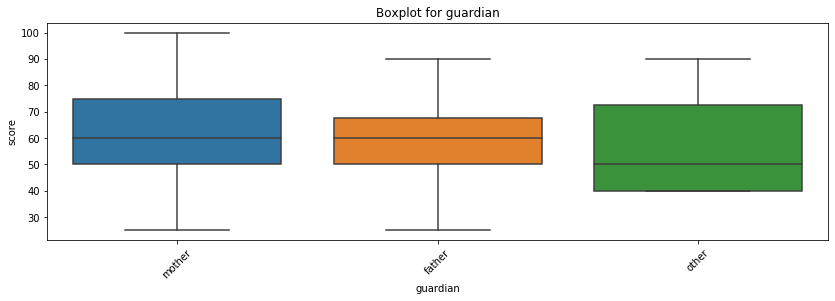

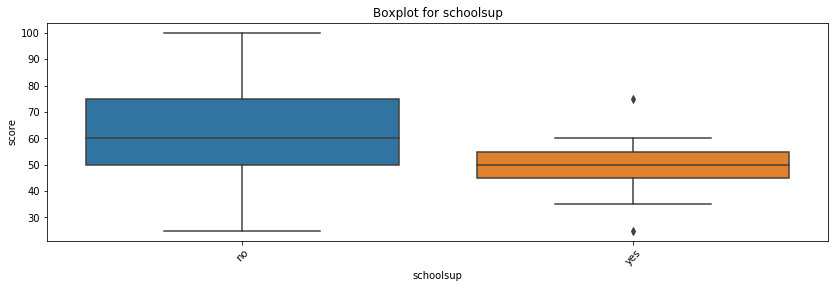

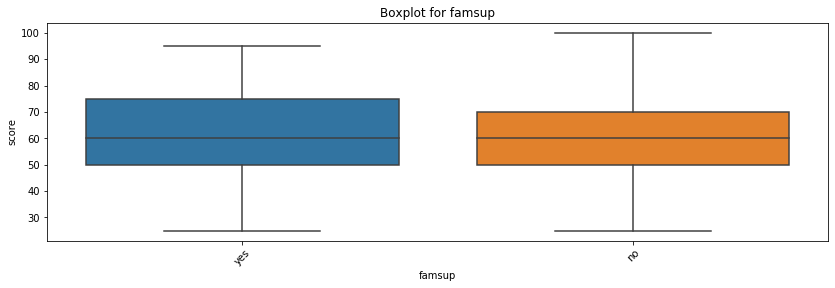

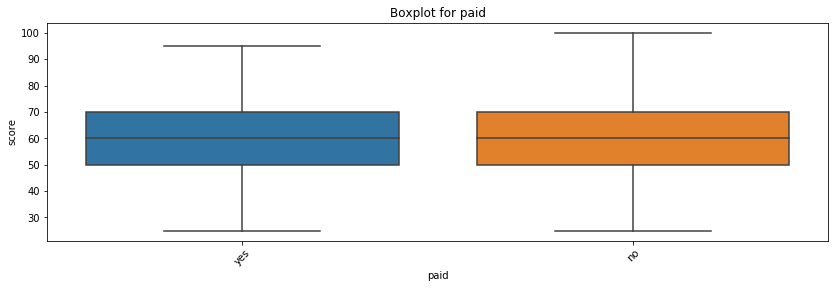

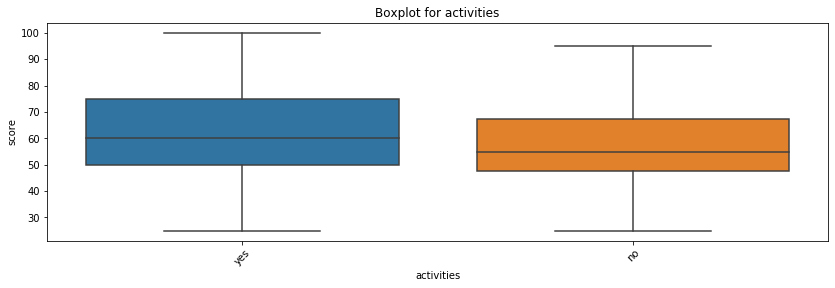

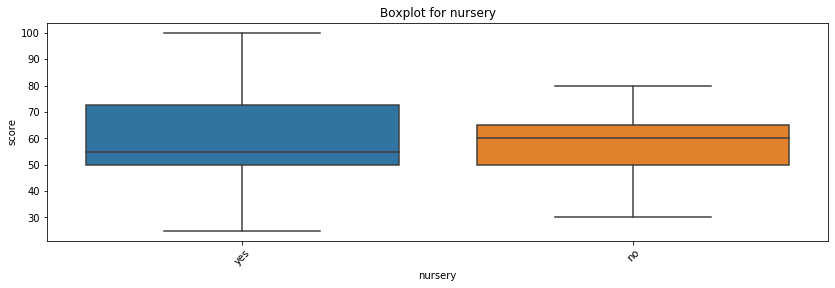

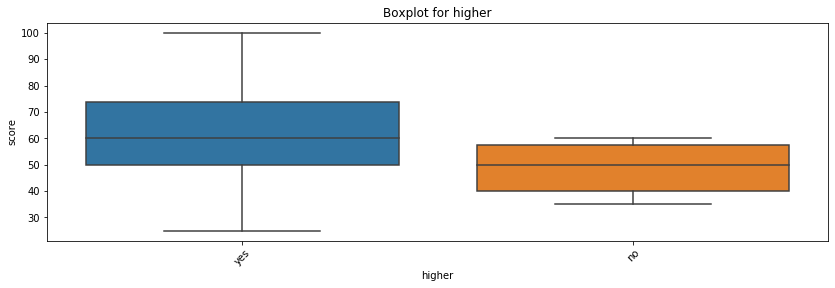

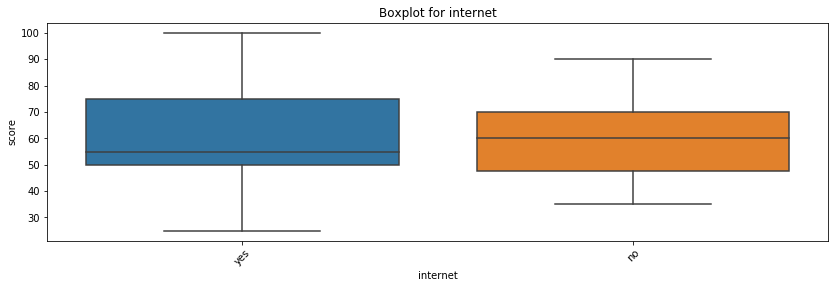

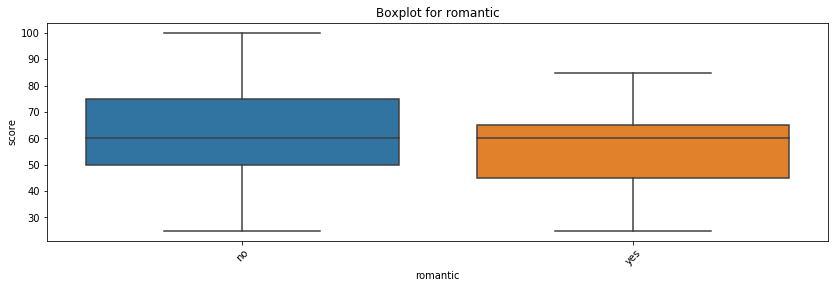

In [79]:
def get_boxplot(column): 
    fig, ax = plt.subplots(figsize = (14, 4)) 
    sns.boxplot(x=column, y='score', data=math_2m.loc[math_2m.loc[:,column].isin(math_2m.loc[:,column].value_counts().index[:10])], ax=ax) 
    plt.xticks(rotation=45) 
    ax.set_title('Boxplot for '+ column) 
    plt.show()
    
   

for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']: 
    get_boxplot(col)

 #### Больший был получают  
Мальчики из школы GP
 #### Городские
 #### Размер семьи не влияет на успеваемость мальчиков
 #### Если родители живут не вместе
 #### Работы матери не влияет (если мама дома -)
 #### У которых отец медик или учитель
 #### (Если выбирали школу неосознанно)
 #### Если нет школьной поддержки
 #### Семейная поддержка не влияет
 #### paid не влияет
 #### activities не влияет
 #### nursery не влияет
 #### которые хотят получить высшее образование
 #### Интернет влияет скорее отрицательно
 #### романтические отношения влияют скорее отрицательно

## Проверка номинативных переменных для мальчиков

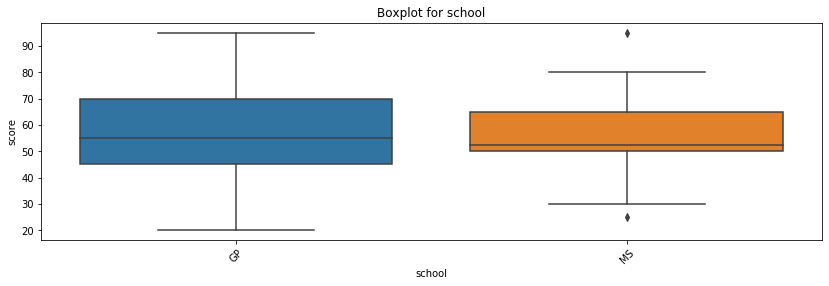

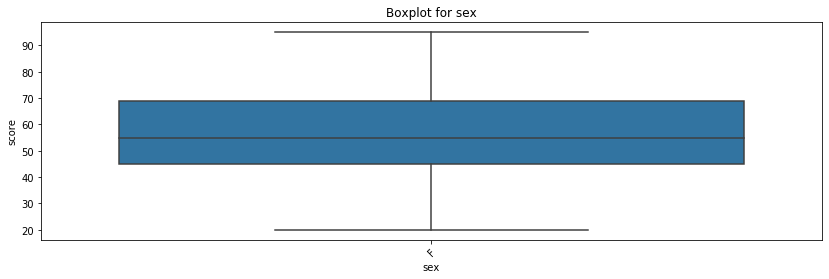

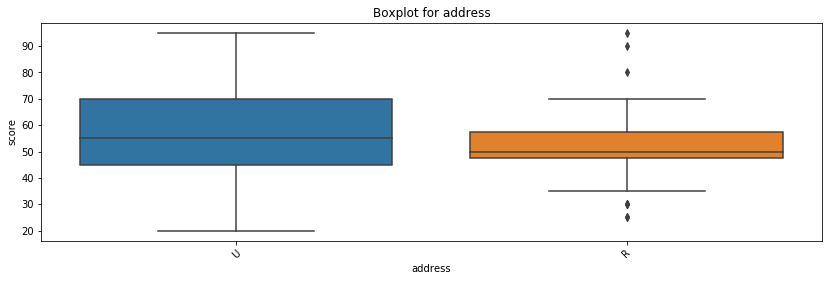

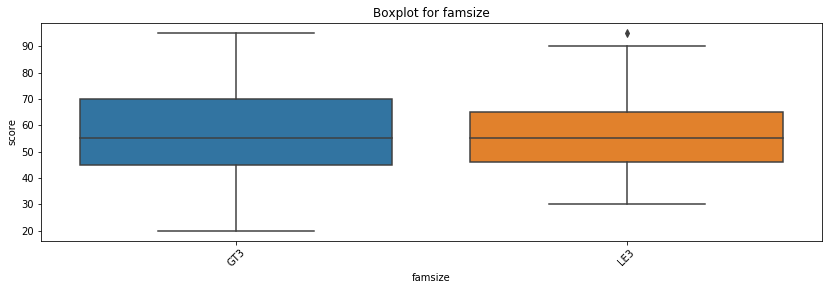

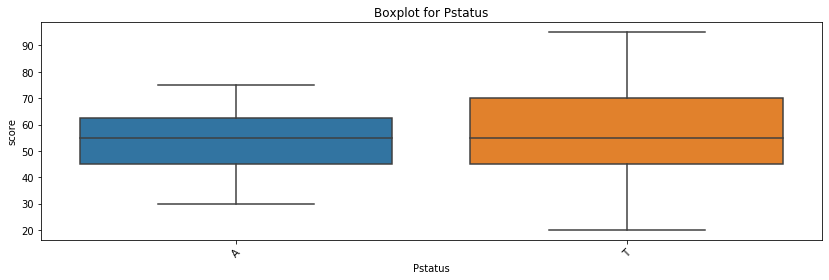

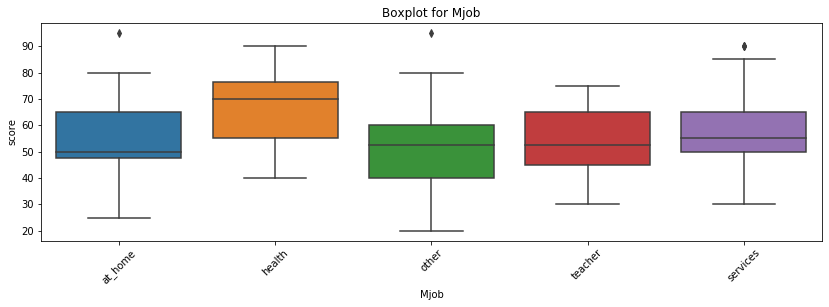

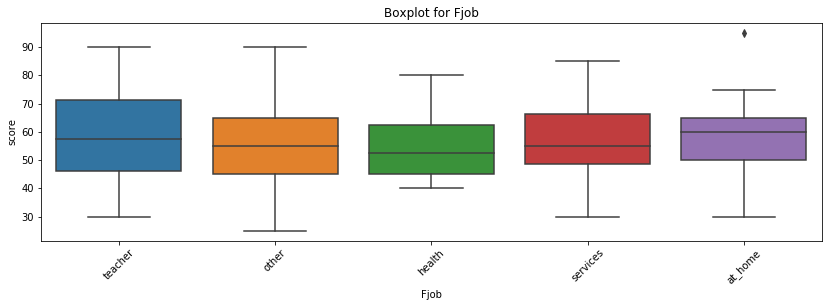

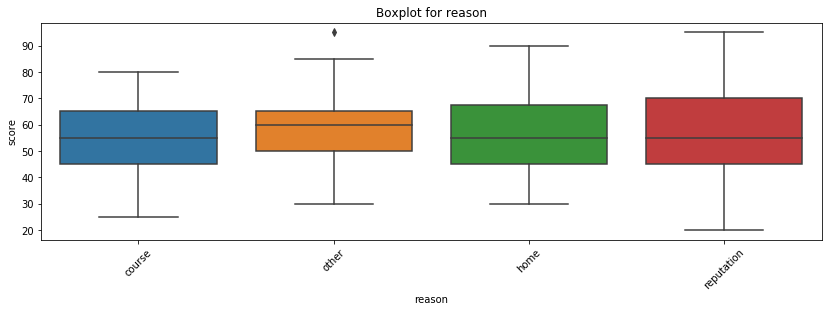

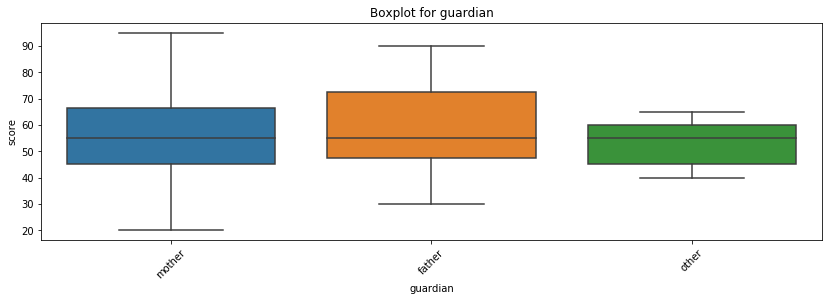

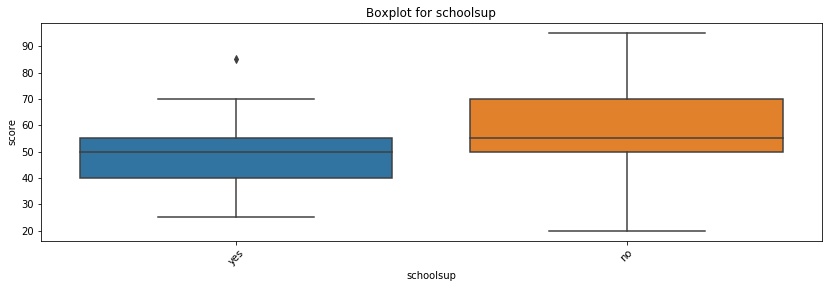

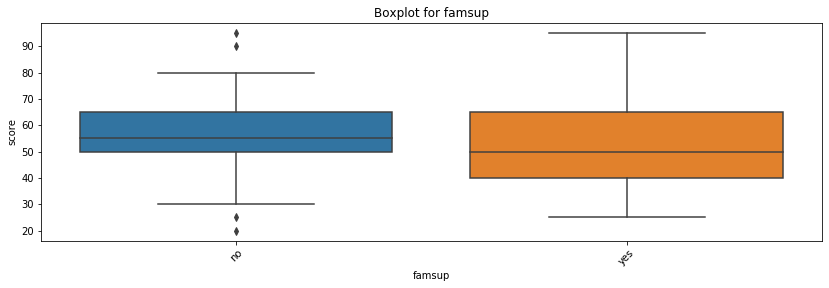

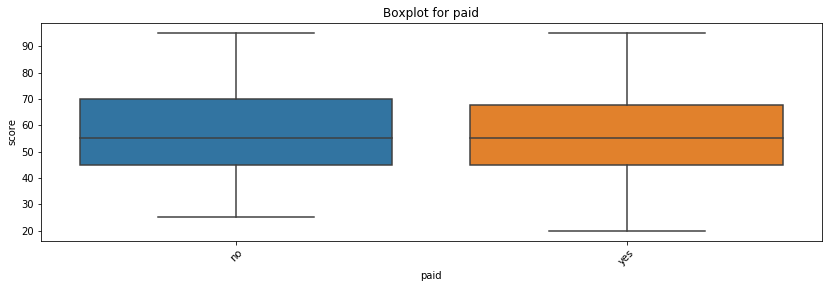

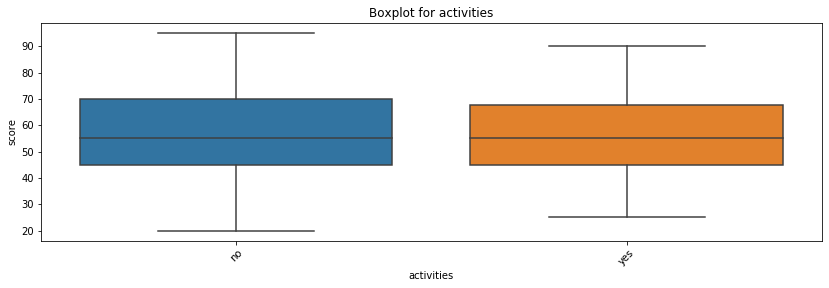

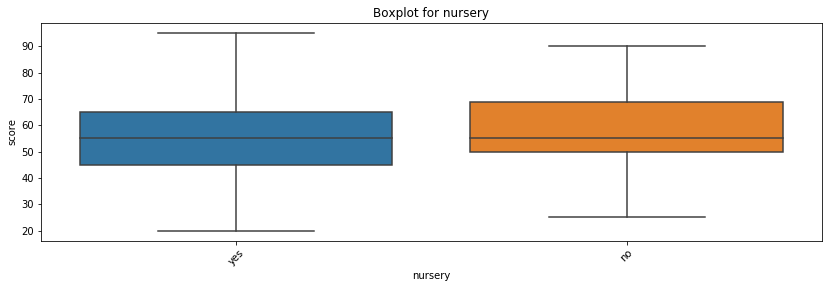

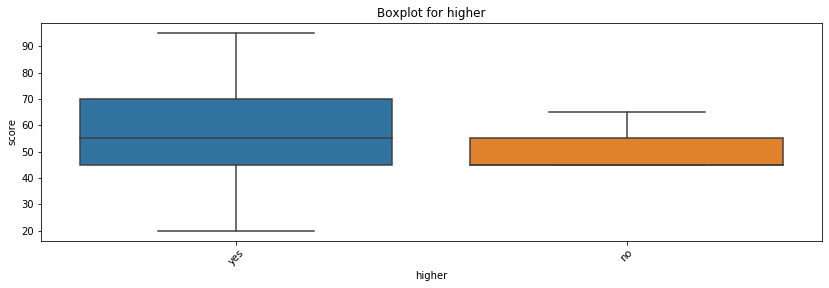

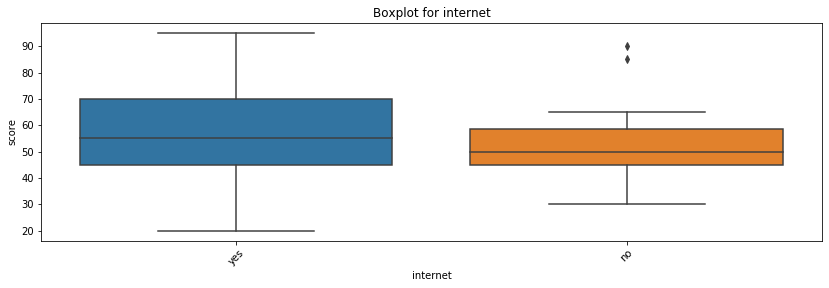

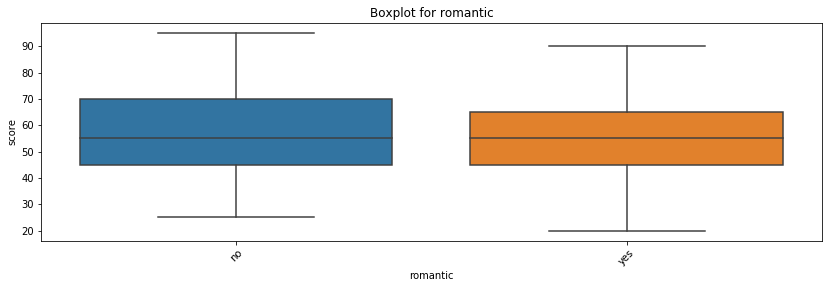

In [80]:
def get_boxplot(column): 
    fig, ax = plt.subplots(figsize = (14, 4)) 
    sns.boxplot(x=column, y='score', data=math_2f.loc[math_2f.loc[:,column].isin(math_2f.loc[:,column].value_counts().index[:10])], ax=ax) 
    plt.xticks(rotation=45) 
    ax.set_title('Boxplot for '+ column) 
    plt.show()
    
   

for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']: 
    get_boxplot(col)
print('\n')

#### Больший был получают  
#### выбор школы не влияет
#### адрес не влияет
#### размер семьи не влияет
#### Влияет совместное проживание родителей в лучшую сторону
#### Положительно влияет работа матери в здравоохранении.
#### Fjob не влияет
#### reason не влияет
#### опека не влияет
#### schoolsup влияет отрицательно
#### famsup влияет скорее отрицательно
#### paid не влияет
#### activities не влияет
#### nursery не влияет
#### higher влияет
#### internet влияет  скорее положительно
#### romentic не влияет

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

# ---Мальчики---

In [81]:
def get_stat_dif(column):
    cols = math_2m.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math_2m.loc[math_2m.loc[:, column] == comb[0], 'score'], 
                        math_2m.loc[math_2m.loc[:, column] == comb[1], 'score']).pvalue <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [82]:
math_2m.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

In [84]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки school
Найдены статистически значимые различия для колонки age
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки higher


# ---Девочки---

In [85]:
def get_stat_dif(column):
    cols = math_2f.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math_2f.loc[math_2f.loc[:, column] == comb[0], 'score'], 
                        math_2f.loc[math_2f.loc[:, column] == comb[1], 'score']).pvalue <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [86]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки schoolsup


# ВЫВОДЫ

#### Как мы видим на оценки по математике у мальчиков и девочек влияет разное количесвто факторов и влияют они по разному. Для мальчиков  найдены статистически значимые различия для колонки 
#### 'school', 'age', 'address', 'Medu', 'Fedu', 'Fjob', 'failures', 'schoolsup', 'higher' и 'absences'
 

-------------------------------------------------------------------------------------------------------------------

#### Для девочек найдены статистически значимые значения
#### 'Mjob', 'studytime', 'schoolsup'